<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Используемые-ресурсы" data-toc-modified-id="Используемые-ресурсы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Используемые ресурсы</a></span></li><li><span><a href="#Подготовка-обучающего-и-тестового-фрейма" data-toc-modified-id="Подготовка-обучающего-и-тестового-фрейма-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка обучающего и тестового фрейма</a></span></li><li><span><a href="#Анализ-структуры-исходных-данных" data-toc-modified-id="Анализ-структуры-исходных-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ структуры исходных данных</a></span></li><li><span><a href="#Корреляция-числовых-и-категориальных-признаков" data-toc-modified-id="Корреляция-числовых-и-категориальных-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Корреляция числовых и категориальных признаков</a></span></li><li><span><a href="#Регрессия-Бустингом" data-toc-modified-id="Регрессия-Бустингом-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Регрессия Бустингом</a></span><ul class="toc-item"><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>XGBoost</a></span><ul class="toc-item"><li><span><a href="#Оценка-ценности-признаков" data-toc-modified-id="Оценка-ценности-признаков-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Оценка ценности признаков</a></span></li><li><span><a href="#Обучение-на-потерях-тестовых-данных" data-toc-modified-id="Обучение-на-потерях-тестовых-данных-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Обучение на потерях тестовых данных</a></span></li><li><span><a href="#Обучение-на-потерях-тестовых-данных-(с-фильтрацией-исходных-признаков)" data-toc-modified-id="Обучение-на-потерях-тестовых-данных-(с-фильтрацией-исходных-признаков)-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Обучение на потерях тестовых данных (с фильтрацией исходных признаков)</a></span></li><li><span><a href="#Обучение-на-потерях-тестовых-данных-(с-фильтрацией-исходных-признаков-и-временного-диапазона)" data-toc-modified-id="Обучение-на-потерях-тестовых-данных-(с-фильтрацией-исходных-признаков-и-временного-диапазона)-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Обучение на потерях тестовых данных (с фильтрацией исходных признаков и временного диапазона)</a></span></li><li><span><a href="#Стандартизация-и-нормализация-данных" data-toc-modified-id="Стандартизация-и-нормализация-данных-5.1.5"><span class="toc-item-num">5.1.5&nbsp;&nbsp;</span>Стандартизация и нормализация данных</a></span></li><li><span><a href="#Обучение-на-потерях-валидационных-данных-при-кросс-валидации-тестовой-выборки" data-toc-modified-id="Обучение-на-потерях-валидационных-данных-при-кросс-валидации-тестовой-выборки-5.1.6"><span class="toc-item-num">5.1.6&nbsp;&nbsp;</span>Обучение на потерях валидационных данных при кросс-валидации тестовой выборки</a></span></li><li><span><a href="#Обучение-на-потерях-валидационных-данных-при-кросс-валидации-генеральной-совокупности" data-toc-modified-id="Обучение-на-потерях-валидационных-данных-при-кросс-валидации-генеральной-совокупности-5.1.7"><span class="toc-item-num">5.1.7&nbsp;&nbsp;</span>Обучение на потерях валидационных данных при кросс-валидации генеральной совокупности</a></span></li><li><span><a href="#Обучение-на-потерях-валидационных-данных-при-кросс-валидации-генеральной-совокупности-(с-фильтрацией-исходных-признаков-и-временного-диапазона)" data-toc-modified-id="Обучение-на-потерях-валидационных-данных-при-кросс-валидации-генеральной-совокупности-(с-фильтрацией-исходных-признаков-и-временного-диапазона)-5.1.8"><span class="toc-item-num">5.1.8&nbsp;&nbsp;</span>Обучение на потерях валидационных данных при кросс-валидации генеральной совокупности (с фильтрацией исходных признаков и временного диапазона)</a></span></li><li><span><a href="#Черновики" data-toc-modified-id="Черновики-5.1.9"><span class="toc-item-num">5.1.9&nbsp;&nbsp;</span>Черновики</a></span></li></ul></li></ul></li></ul></div>

**Исследуемый субъект:** республика Татарстан. Генеральная совокупность: 01.04.2013 – 29.09.2023, тестовая выборка: 2023 год (09.01.2023 – 29.09.2023)

# Используемые ресурсы

In [1066]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import xgboost as xgb
from tqdm import tqdm
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Подготовка обучающего и тестового фрейма

In [1204]:
# формируем генеральную совокупность
df = pd.read_excel('Tatarstan.xlsx')
df = df[['Year', 'Month', 'Day', 'Hour', 'Volume']]

df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['Weekday'] = df['date'].dt.weekday  # добавление дня недели
df = df.drop('date', axis=1)
df = df.drop_duplicates(subset=['Year', 'Month', 'Day', 'Hour'])  # удаление возможных дубликатов
df = df[['Year', 'Month', 'Day', 'Hour', 'Weekday', 'Volume']]  # упорядочиваем столбцы

# формируем обучающий датафрейм
df_train = df[df['Year'] < 2023]

# формируем тестовую выборку
df_test = df[df['Year'] == 2023]
df_test.reset_index(drop=True, inplace=True)

In [5]:
df

,Year,Month,Day,Hour,Weekday,Volume
0,2013,4,1,1,0,2814.717
1,2013,4,1,2,0,2747.458
2,2013,4,1,3,0,2734.133
3,2013,4,1,4,0,2736.587
4,2013,4,1,5,0,2796.396
...,...,...,...,...,...,...
61915,2023,9,29,20,4,3007.878
61916,2023,9,29,21,4,2961.277
61917,2023,9,29,22,4,2869.880
61918,2023,9,29,23,4,2714.670


In [6]:
df.info() # пропуски в данных отсутствуют

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61920 entries, 0 to 61919
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     61920 non-null  int64  
 1   Month    61920 non-null  int64  
 2   Day      61920 non-null  int64  
 3   Hour     61920 non-null  int64  
 4   Weekday  61920 non-null  int64  
 5   Volume   61920 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 3.3 MB


In [55]:
df_train

,Year,Month,Day,Hour,Weekday,Volume
0,2013,4,1,1,0,2814.717
1,2013,4,1,2,0,2747.458
2,2013,4,1,3,0,2734.133
3,2013,4,1,4,0,2736.587
4,2013,4,1,5,0,2796.396
...,...,...,...,...,...,...
57523,2022,12,30,20,4,3664.178
57524,2022,12,30,21,4,3609.495
57525,2022,12,30,22,4,3569.476
57526,2022,12,30,23,4,3429.831


In [56]:
df_test

,Year,Month,Day,Hour,Weekday,Volume
0,2023,1,9,1,0,3439.149
1,2023,1,9,2,0,3381.470
2,2023,1,9,3,0,3349.565
3,2023,1,9,4,0,3362.296
4,2023,1,9,5,0,3385.085
...,...,...,...,...,...,...
4387,2023,9,29,20,4,3007.878
4388,2023,9,29,21,4,2961.277
4389,2023,9,29,22,4,2869.880
4390,2023,9,29,23,4,2714.670


# Анализ структуры исходных данных

*График структуры потребления электрической энергии за 10 лет*

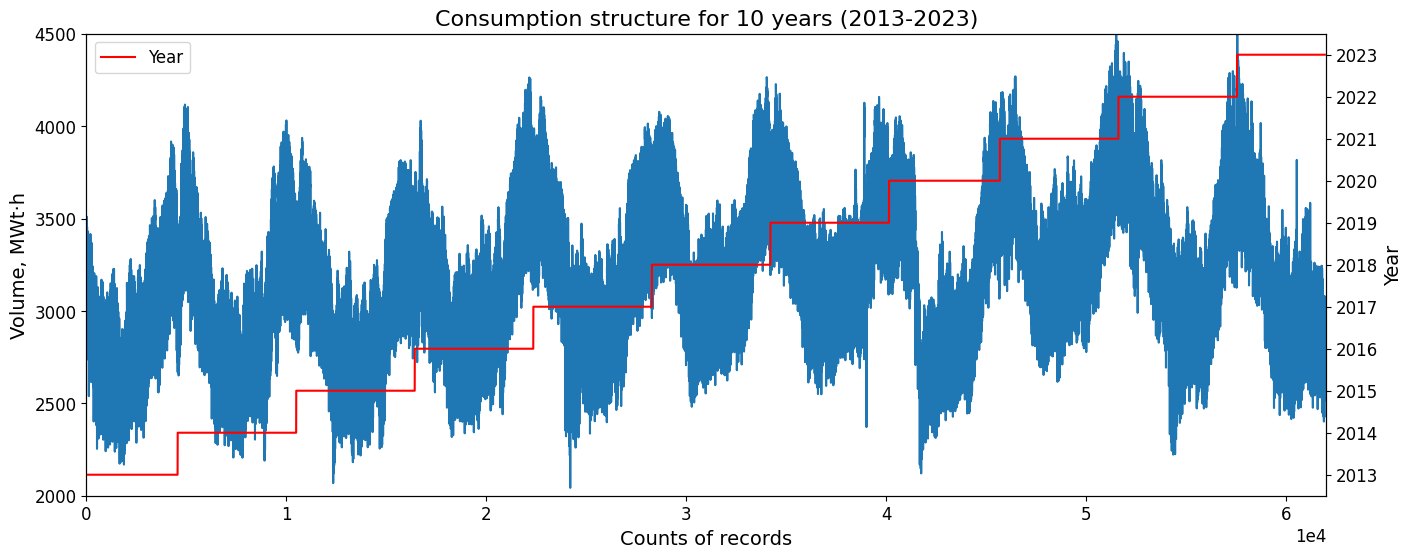

In [1205]:
'''df[['Volume']].plot(figsize=(16,6), 
                    title='Сonsumption structure for 10 years (2013-2023)',
                    xlim=(0, 62000), ylim=(2000, 4500),
                    xlabel='Counts of records',
                    ylabel='Volume, kWt·h', 
                    legend=None,
                    grid=True)'''

fig, df_volume = plt.subplots(figsize=(16,6))
df_year = df_volume.twinx()

df_volume.plot(df['Volume'], label='Volume')
df_year.plot(df['Year'], label='Year', color='r')

plt.rcParams['font.size'] = '12'

df_volume.set_xlim(0, 62000)  #  поправить параметры при изменении периода исследования
df_volume.set_ylim(2000, 4500)  #  поправить параметры при смене региона
df_volume.set_ylabel('Volume, MWt·h', fontsize = 14)
df_volume.set_xlabel('Counts of records', fontsize = 14)
df_year.set_ylabel('Year', fontsize = 14)
df_year.yaxis.set_major_locator(ticker.MultipleLocator(1.00))

plt.title('Сonsumption structure for 10 years (2013-2023)', fontsize = 16)
plt.legend()

*График структуры потребления электрической энергии по месяцам 2022 года*

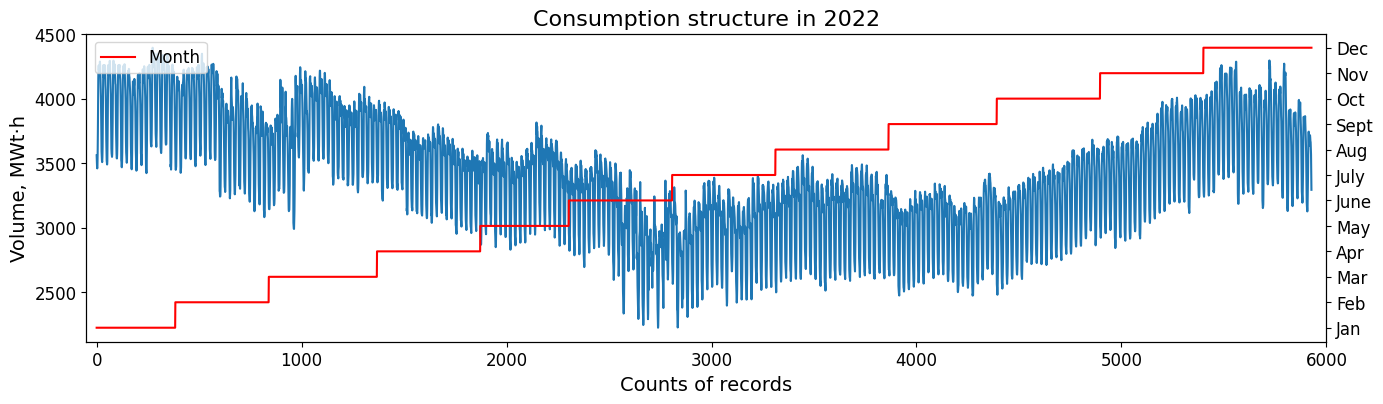

In [1206]:
df_last_year = df[df['Year'] == 2022]
df_last_year.reset_index(drop=True, inplace=True)

fig, df_volume = plt.subplots(figsize=(16,4))
df_month = df_volume.twinx()

df_volume.plot(df_last_year['Volume'], label='Volume')
df_month.plot(df_last_year['Month'], label='Month', color='r')

plt.rcParams['font.size'] = '12'

df_volume.set_xlim(-50, 6000)
df_volume.set_ylabel('Volume, MWt·h', fontsize = 14)
df_volume.set_xlabel('Counts of records', fontsize = 14)
df_month.yaxis.set_major_locator(ticker.FixedLocator([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]))
df_month.yaxis.set_major_formatter(ticker.FixedFormatter(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']))

plt.title('Сonsumption structure in 2022', fontsize = 16)
plt.legend()

*График структуры потребления электрической энергии по дням недели в сентябре 2023 года*

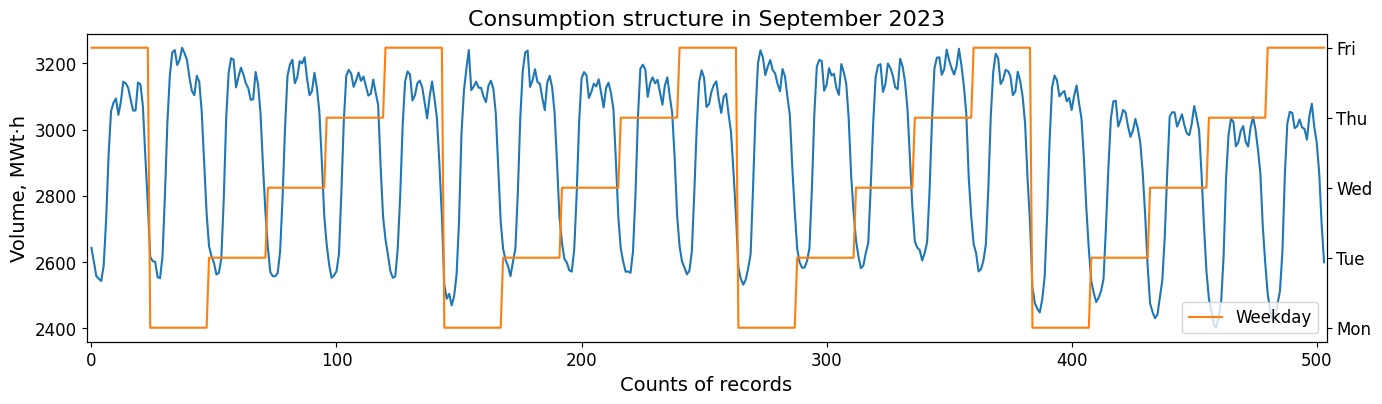

In [1207]:
df_sept = df_test[df_test['Month'] == 9]
df_sept.reset_index(drop=True, inplace=True)

fig, df_volume = plt.subplots(figsize=(16,4))
df_weekday = df_volume.twinx()

df_volume.plot(df_sept['Volume'], label='Volume')
df_weekday.plot(df_sept['Weekday'], label='Weekday', color='#ff7f0e')

plt.rcParams['font.size'] = '12'

df_volume.set_xlim(-2, 504)
df_volume.set_ylabel('Volume, MWt·h', fontsize = 14)
df_volume.set_xlabel('Counts of records', fontsize = 14)
df_weekday.yaxis.set_major_locator(ticker.FixedLocator([0, 1, 2, 3, 4, 5, 6]))
df_weekday.yaxis.set_major_formatter(ticker.FixedFormatter(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']))

plt.title('Сonsumption structure in September 2023', fontsize = 16)
plt.legend()

# Корреляция числовых и категориальных признаков

In [762]:
# корреляция исходных значений и целевого признака
color_map = sns.color_palette("vlag", as_cmap=True)

df.corr('pearson').style.background_gradient(cmap=color_map, vmin = -1, vmax=1)

,Year,Month,Day,Hour,Weekday,Volume
Year,1.000000,-0.099769,0.000904,0.000000,0.009833,0.273379
Month,-0.099769,1.000000,-0.040501,-0.000000,-0.005979,-0.053555
Day,0.000904,-0.040501,1.000000,-0.000000,-0.002668,0.009467
Hour,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.343660
Weekday,0.009833,-0.005979,-0.002668,0.000000,1.000000,0.007796
Volume,0.273379,-0.053555,0.009467,0.343660,0.007796,1.000000


**Вывод**: ощутимая корреляционная связь объема с годом и часом

# Регрессия Бустингом

## XGBoost

### Оценка ценности признаков

In [839]:
# классификация ценности признаков в контексте регрессора XGBoost
selector = xgb.XGBRegressor(random_state=10)
result = selector.fit(df[dataset[0]], df['Volume'])
features_table = pd.DataFrame(result.feature_importances_, index = dataset[0], columns = ['importance'])

# исследуемый список датасетов с учетом ценности признаков
dataset = list([['Year', 'Month', 'Day', 'Hour', 'Weekday'],
                ['Year', 'Month', 'Day', 'Hour'],
                ['Year', 'Month', 'Hour']])

predictions = list(['Predicted',
                    'Predicted_W',
                    'Predicted_WD'])

messages = list(['Full set:              ',
                 'Without Weekday:       ',
                 'Without Weekday & Day:'])

features_table.sort_values(by='importance', ascending=False)

,importance
Hour,0.513631
Month,0.343980
Year,0.109786
Day,0.023988
Weekday,0.008615


### Обучение на потерях тестовых данных

In [1005]:
%%time

# перебор гиперпараметров во вложенном цикле
df_boost_train = df_train.copy()  # формируем обучающий датафрейм
df_boost_test = df_test.copy()

# инициализируем итоговый датафрейм с метриками качества при различных гиперпараметрах модели
df_result = pd.DataFrame({'depth':[], 
                          'n_estimators':[], 
                          'MAE':[], 
                          'MAPE':[]})

# обучаем модель
index = 0  # количество узлов сетки
for i in range(2, 11):  # глубина дерева (max_depth)
    for j in range(2, 101):  # количество деревьев (n_estimators)
        model = xgb.XGBRegressor(max_depth=i, n_estimators=j, tree_method='gpu_hist')
        model.fit(df_boost_train[['Year', 'Month', 'Day', 'Hour', 'Weekday']], 
                  df_boost_train['Volume'])

        df_boost_test['Predicted'] = model.predict(df_boost_test[['Year', 'Month', 'Day', 'Hour', 'Weekday']])

        # заполняем итоговый датафрейм метриками MAE и MAPE
        df_result.loc[index] = (f'{i}', f'{j}', 
                                f"{MAE(df_boost_test['Predicted'], df_boost_test['Volume']):.2f}", 
                                MAPE(df_boost_test['Predicted'], df_boost_test['Volume']))
        index += 1;
    
print("Минимальная погрешность:",
      f"MAE: {df_result.MAE[df_result.MAPE.idxmin()]} [MW],",
      f"MAPE: {df_result.MAPE.min():.2%},", 
      f"max_depth: {df_result.depth[df_result.MAPE.idxmin()]},",
      f"n_estimators: {df_result.n_estimators[df_result.MAPE.idxmin()]}", "\n")

df_result.loc[df_result.MAPE.idxmin()-2:df_result.MAPE.idxmin()+2].style.highlight_min(color='yellowgreen', subset='MAPE')

Минимальная погрешность: MAE: 108.12 [MW], MAPE: 3.33%, max_depth: 4, n_estimators: 9 

CPU times: total: 8.05 s
Wall time: 1.83 s


,depth,n_estimators,MAE,MAPE
5,4,7,163.19,0.051730
6,4,8,116.98,0.036113
7,4,9,108.12,0.033317
8,5,2,1532.21,0.901186
9,5,3,1025.96,0.463783


Аналогичный расчет для обучающей выборки:
- за 3 года (2020-2022): MAPE 3.12%, MAE 101.43 МВт·ч при max_depth – 5 и n_estimators – 9
- за 4 года (2019-2022): MAPE 2.88%, MAE 93.6 МВт·ч при max_depth – 5 и n_estimators – 9
- за 5 лет (2018-2022): MAPE 3.04%, MAE 99.35 МВт·ч при max_depth – 5 и n_estimators – 9 <br>

### Обучение на потерях тестовых данных (с фильтрацией исходных признаков)
*Удаляем "малозначимые" (в контексте регрессора XGBoost) данные из датасета*

In [753]:
%%time

df_boost_train = df_train.copy()  # формируем обучающий датафрейм
df_boost_test = df_test.copy()

for data in range(len(dataset)):  # выбор датасета

    # инициализируем итоговый датафрейм с метриками качества при различных гиперпараметрах модели
    df_result = pd.DataFrame({'depth':[], 
                              'n_estimators':[], 
                              'MAE':[], 
                              'MAPE':[]})

    index = 0  # индекс узла сетки
    for i in range(2, 11):  # глубина дерева (max_depth)
        for j in range(2, 101):  # количество деревьев (n_estimators)
            model = xgb.XGBRegressor(max_depth=i, n_estimators=j, tree_method='gpu_hist') # обучаем модель
            model.fit(df_boost_train[dataset[data]], df_boost_train['Volume'])

            df_boost_test[predictions[data]] = model.predict(df_boost_test[dataset[data]])
            
            # заполняем итоговый датафрейм метриками MAE и MAPE
            df_result.loc[index] = (f'{i}', f'{j}', 
                                    f"{MAE(df_boost_test[predictions[data]], df_boost_test['Volume']):.2f}", 
                                    MAPE(df_boost_test[predictions[data]], df_boost_test['Volume']))
            index += 1;

    # метрики качества прогноза 
    print(messages[data],
          f"MAE: {df_result.MAE[df_result.MAPE.idxmin()]} [MW],",
          f"MAPE: {df_result.MAPE.min():.2%},", 
          f"max_depth: {df_result.depth[df_result.MAPE.idxmin()]},",
          f"n_estimators: {df_result.n_estimators[df_result.MAPE.idxmin()]}")
    
print()

Full set:               MAE: 103.31 [MW], MAPE: 3.19%, max_depth: 6, n_estimators: 9
Without Weekday:        MAE: 104.61 [MW], MAPE: 3.24%, max_depth: 6, n_estimators: 9
Without Weekday & Hour: MAE: 102.78 [MW], MAPE: 3.17%, max_depth: 6, n_estimators: 9

CPU times: total: 49min 35s
Wall time: 11min 50s


### Обучение на потерях тестовых данных (с фильтрацией исходных признаков и временного диапазона)

In [1000]:
%%time

# инициализируем итоговый датафрейм по всем временным интервалам (3-10 лет)
df_general_result = pd.DataFrame({'period':[],  # рассматриваемый временной интервал
                                  'set': [],  # тип датасета
                                  'MAE [MW]':[],  # минимальная средняя абсолютная ошибка
                                  'MAPE':[],  # минимальная средняя относительная ошибка
                                  'max_depth':[],  # оптимальная глубина дерева
                                  'n_estimators':[]})  # оптимальное количество деревьев

index = 0  # индекс узла сетки итогового датафрейма

df_boost_test = df_test.copy()

for time in range(2020, 2012, -1):

    df_boost_train = df_train[df_train['Year'] >= time]  # формируем обучающий датафрейм под рассматриваемый интервал

    for data in range(len(dataset)):  # выбор датасета

        # инициализируем промежуточный датафрейм с метриками качества при различных гиперпараметрах модели
        df_result = pd.DataFrame({'depth':[], 
                                  'n_estimators':[], 
                                  'MAE':[], 
                                  'MAPE':[]})

        node = 0  # индекс узла сетки промежуточного датафрейма
        for i in range(3, 13):  # глубина дерева (max_depth)
            for j in range(4, 20):  # количество деревьев (n_estimators)
                model = xgb.XGBRegressor(max_depth=i, n_estimators=j, tree_method='gpu_hist') # обучаем модель
                model.fit(df_boost_train[dataset[data]], df_boost_train['Volume'])

                df_boost_test[predictions[data]] = model.predict(df_boost_test[dataset[data]])

                # заполняем промежуточный датафрейм метриками MAE и MAPE
                df_result.loc[node] = (f'{i}', f'{j}', 
                                        f"{MAE(df_boost_test[predictions[data]], df_boost_test['Volume']):.2f}", 
                                        MAPE(df_boost_test[predictions[data]], df_boost_test['Volume']))
                node += 1;

        # заполняем итоговый датафрейм лучшим результатом для данной выборки
        df_general_result.loc[index] = (2023 - time, messages[data], 
                                        df_result.MAE[df_result.MAPE.idxmin()], 
                                        df_result.MAPE.min(),
                                        df_result.depth[df_result.MAPE.idxmin()],
                                        df_result.n_estimators[df_result.MAPE.idxmin()])
        index += 1;

#print()

CPU times: total: 43min 55s
Wall time: 6min 58s


*Полученная комбинация оптимальных гиперпараметров при различной глубине временного интервала заданных датасетов*

In [1001]:
df_general_result.style.highlight_min(color='yellowgreen', subset='MAPE')

,period,set,MAE [MW],MAPE,max_depth,n_estimators
0,3,Full set:,101.43,0.031152,5,9
1,3,Without Weekday:,99.91,0.030677,5,9
2,3,Without Weekday & Day:,105.59,0.032422,5,9
3,4,Full set:,93.62,0.028763,5,9
4,4,Without Weekday:,94.11,0.028926,5,9
5,4,Without Weekday & Day:,93.81,0.028827,5,9
6,5,Full set:,99.35,0.030444,5,9
7,5,Without Weekday:,103.14,0.031812,5,9
8,5,Without Weekday & Day:,99.60,0.030618,5,9
9,6,Full set:,93.90,0.028849,5,9


*Предельные показатели метрики MAPE при различной глубине исследуемого интервала*

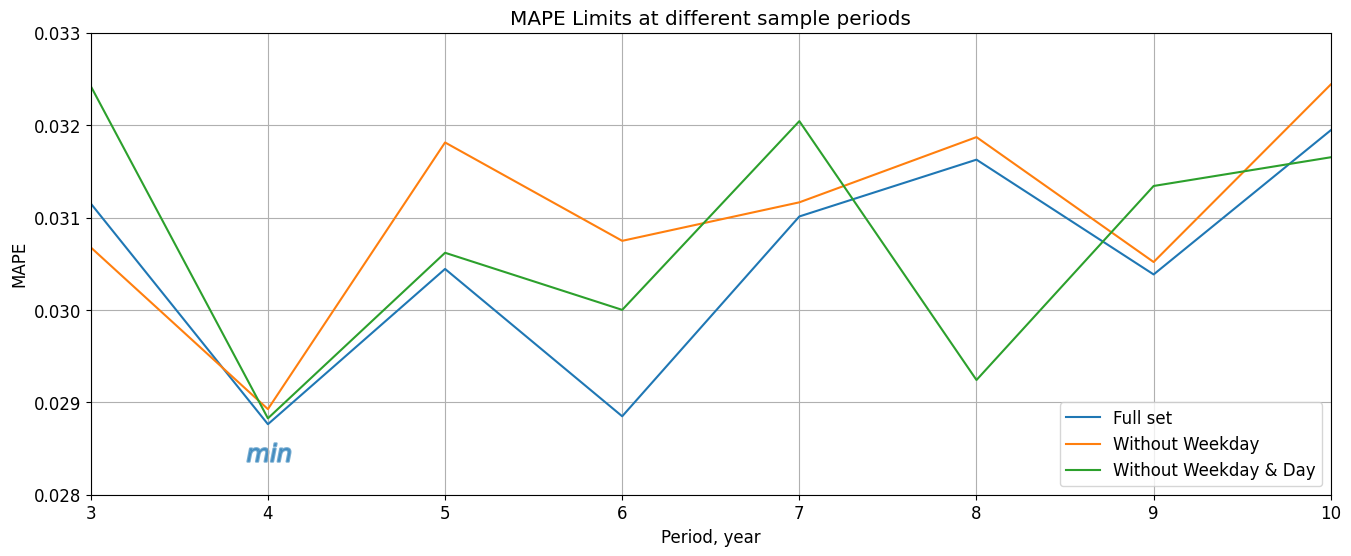

In [1002]:
plot_gen = list()
for i in range(len(messages)):
    plot_gen.append(df_general_result[df_general_result['set'] == messages[i]])
    plot_gen[i]=plot_gen[i][['period', 'MAPE']]
    plot_gen[i].set_index('period', inplace= True)
    plot_gen[i] = plot_gen[i].rename(columns={'MAPE': messages[i].rstrip()[:-1]})

pd.concat([plot_gen[i] for i in range(3)], axis=1).plot(figsize=(16,6), 
                                                        title='MAPE Limits at different sample periods',
                                                        xlim=(3, 10), ylim=(0.028, 0.033),
                                                        xlabel='Period, year',
                                                        ylabel='MAPE',
                                                        legend=True,
                                                        grid=True)

plt.scatter(df_general_result.period[df_general_result.MAPE.idxmin()], 
            df_general_result.MAPE.min()-0.0003,
            linewidth=1.5,
            marker='$min$',
            alpha=0.6,
            s=1000)

**Выводы**: 
1. Фильтрация малозначимых исходных данных в *большинстве* случаев **снижает** точность прогнозной модели. 
2. Ограничение объема тестовой выборки приводит к **снижению** погрешности на 0.18–0.36%. Лучший результат был получен для тестовой выборки объемом в **4 года**.
3. При фильтрации исходных данных как по строкам, так и по столбцам, в *большинстве случаев* оптимальные гиперпараметры остаются **такими же**, как у исходного датасета.

### Стандартизация и нормализация данных

In [729]:
df_boost_train = df_train.copy()  # формируем обучающий датафрейм
df_boost_test = df_test.copy()  # формируем тестовый датафрейм

# задаём гиперпараметры модели
model = xgb.XGBRegressor(max_depth=6, n_estimators=9) # выполнить поиск оптимальных гиперпараметров
scaler_list = list([StandardScaler(), MinMaxScaler()])

for scaler in scaler_list:
    
    print("\033[30m\033[32m{}\033[0m".format(scaler))
    
    # нормировка/стандартизация данных перед их использованием
    X_train = scaler.fit_transform(df_boost_train[['Year', 'Month', 'Day', 'Hour', 'Weekday']])
    Y_train = df_boost_train['Volume']
    X_test = scaler.transform(df_boost_test[['Year', 'Month', 'Day', 'Hour', 'Weekday']])

    # обучаем модель
    model.fit(X_train, Y_train)

    # Предсказываем пиковый час
    df_boost_test['Predicted'] = model.predict(X_test)

    # Метрики качества прогноза
    print('MAE:', f"{MAE(df_boost_test['Predicted'], df_boost_test['Volume']):.2f} [MW],",
          'MAPE:', f"{MAPE(df_boost_test['Predicted'], df_boost_test['Volume']):.2%}", '\n')

StandardScaler()
MAE: 102.51 [MW], MAPE: 3.18% 

MinMaxScaler()
MAE: 102.51 [MW], MAPE: 3.18% 



**Выводы**: нормализация и стандартизация данных с помощью `MinMaxScaler()` и `StandardScaler()` не оказывает влияния на результат ни в этом, ни во всех других случаях

### Обучение на потерях валидационных данных при кросс-валидации тестовой выборки

In [499]:
%%time

# поиск лучших гиперпараметров XGBoost с помощью сетки гиперпараметров
df_boost_train = df_train.copy()  # формируем обучающий датафрейм
df_boost_test = df_test.copy()

XGB_search = GridSearchCV(estimator=xgb.XGBRegressor(tree_method='gpu_hist'), 
                          param_grid={'max_depth': range(2, 11),
                                     'n_estimators': range(2, 101)}, 
                          scoring='neg_mean_absolute_percentage_error', 
                          verbose = 3,
                          cv=5)

XGB_search.fit(df_boost_train[['Year', 'Month', 'Day', 'Hour', 'Weekday']], df_boost_train['Volume'])

XGB_best = XGB_search.best_estimator_

XGB_best.fit(df_boost_train[['Year', 'Month', 'Day', 'Hour', 'Weekday']], df_boost_train['Volume'])

Fitting 5 folds for each of 882 candidates, totalling 4410 fits
[CV 1/5] END ......max_depth=2, n_estimators=2;, score=-0.449 total time=   0.1s
[CV 2/5] END ......max_depth=2, n_estimators=2;, score=-0.463 total time=   0.0s
[CV 3/5] END ......max_depth=2, n_estimators=2;, score=-0.496 total time=   0.0s
[CV 4/5] END ......max_depth=2, n_estimators=2;, score=-0.494 total time=   0.0s
[CV 5/5] END ......max_depth=2, n_estimators=2;, score=-0.523 total time=   0.0s
[CV 1/5] END ......max_depth=2, n_estimators=3;, score=-0.291 total time=   0.0s
[CV 2/5] END ......max_depth=2, n_estimators=3;, score=-0.318 total time=   0.0s
[CV 3/5] END ......max_depth=2, n_estimators=3;, score=-0.338 total time=   0.0s
[CV 4/5] END ......max_depth=2, n_estimators=3;, score=-0.330 total time=   0.0s
[CV 5/5] END ......max_depth=2, n_estimators=3;, score=-0.386 total time=   0.0s
[CV 1/5] END ......max_depth=2, n_estimators=4;, score=-0.194 total time=   0.0s
[CV 2/5] END ......max_depth=2, n_estimators=

[CV 4/5] END .....max_depth=2, n_estimators=22;, score=-0.056 total time=   0.0s
[CV 5/5] END .....max_depth=2, n_estimators=22;, score=-0.074 total time=   0.0s
[CV 1/5] END .....max_depth=2, n_estimators=23;, score=-0.042 total time=   0.0s
[CV 2/5] END .....max_depth=2, n_estimators=23;, score=-0.049 total time=   0.0s
[CV 3/5] END .....max_depth=2, n_estimators=23;, score=-0.037 total time=   0.0s
[CV 4/5] END .....max_depth=2, n_estimators=23;, score=-0.056 total time=   0.0s
[CV 5/5] END .....max_depth=2, n_estimators=23;, score=-0.063 total time=   0.0s
[CV 1/5] END .....max_depth=2, n_estimators=24;, score=-0.042 total time=   0.0s
[CV 2/5] END .....max_depth=2, n_estimators=24;, score=-0.048 total time=   0.0s
[CV 3/5] END .....max_depth=2, n_estimators=24;, score=-0.037 total time=   0.0s
[CV 4/5] END .....max_depth=2, n_estimators=24;, score=-0.056 total time=   0.0s
[CV 5/5] END .....max_depth=2, n_estimators=24;, score=-0.063 total time=   0.0s
[CV 1/5] END .....max_depth=

[CV 2/5] END .....max_depth=2, n_estimators=43;, score=-0.045 total time=   0.0s
[CV 3/5] END .....max_depth=2, n_estimators=43;, score=-0.036 total time=   0.0s
[CV 4/5] END .....max_depth=2, n_estimators=43;, score=-0.056 total time=   0.0s
[CV 5/5] END .....max_depth=2, n_estimators=43;, score=-0.052 total time=   0.0s
[CV 1/5] END .....max_depth=2, n_estimators=44;, score=-0.039 total time=   0.0s
[CV 2/5] END .....max_depth=2, n_estimators=44;, score=-0.045 total time=   0.0s
[CV 3/5] END .....max_depth=2, n_estimators=44;, score=-0.036 total time=   0.0s
[CV 4/5] END .....max_depth=2, n_estimators=44;, score=-0.056 total time=   0.0s
[CV 5/5] END .....max_depth=2, n_estimators=44;, score=-0.052 total time=   0.0s
[CV 1/5] END .....max_depth=2, n_estimators=45;, score=-0.039 total time=   0.0s
[CV 2/5] END .....max_depth=2, n_estimators=45;, score=-0.045 total time=   0.0s
[CV 3/5] END .....max_depth=2, n_estimators=45;, score=-0.036 total time=   0.0s
[CV 4/5] END .....max_depth=

[CV 4/5] END .....max_depth=2, n_estimators=63;, score=-0.056 total time=   0.0s
[CV 5/5] END .....max_depth=2, n_estimators=63;, score=-0.053 total time=   0.1s
[CV 1/5] END .....max_depth=2, n_estimators=64;, score=-0.039 total time=   0.1s
[CV 2/5] END .....max_depth=2, n_estimators=64;, score=-0.045 total time=   0.1s
[CV 3/5] END .....max_depth=2, n_estimators=64;, score=-0.035 total time=   0.1s
[CV 4/5] END .....max_depth=2, n_estimators=64;, score=-0.056 total time=   0.1s
[CV 5/5] END .....max_depth=2, n_estimators=64;, score=-0.053 total time=   0.1s
[CV 1/5] END .....max_depth=2, n_estimators=65;, score=-0.039 total time=   0.1s
[CV 2/5] END .....max_depth=2, n_estimators=65;, score=-0.045 total time=   0.1s
[CV 3/5] END .....max_depth=2, n_estimators=65;, score=-0.035 total time=   0.1s
[CV 4/5] END .....max_depth=2, n_estimators=65;, score=-0.056 total time=   0.1s
[CV 5/5] END .....max_depth=2, n_estimators=65;, score=-0.053 total time=   0.1s
[CV 1/5] END .....max_depth=

[CV 2/5] END .....max_depth=2, n_estimators=84;, score=-0.045 total time=   0.1s
[CV 3/5] END .....max_depth=2, n_estimators=84;, score=-0.035 total time=   0.1s
[CV 4/5] END .....max_depth=2, n_estimators=84;, score=-0.055 total time=   0.1s
[CV 5/5] END .....max_depth=2, n_estimators=84;, score=-0.054 total time=   0.1s
[CV 1/5] END .....max_depth=2, n_estimators=85;, score=-0.038 total time=   0.1s
[CV 2/5] END .....max_depth=2, n_estimators=85;, score=-0.044 total time=   0.1s
[CV 3/5] END .....max_depth=2, n_estimators=85;, score=-0.035 total time=   0.1s
[CV 4/5] END .....max_depth=2, n_estimators=85;, score=-0.055 total time=   0.1s
[CV 5/5] END .....max_depth=2, n_estimators=85;, score=-0.053 total time=   0.1s
[CV 1/5] END .....max_depth=2, n_estimators=86;, score=-0.039 total time=   0.1s
[CV 2/5] END .....max_depth=2, n_estimators=86;, score=-0.045 total time=   0.1s
[CV 3/5] END .....max_depth=2, n_estimators=86;, score=-0.035 total time=   0.1s
[CV 4/5] END .....max_depth=

[CV 5/5] END ......max_depth=3, n_estimators=6;, score=-0.174 total time=   0.0s
[CV 1/5] END ......max_depth=3, n_estimators=7;, score=-0.075 total time=   0.0s
[CV 2/5] END ......max_depth=3, n_estimators=7;, score=-0.068 total time=   0.0s
[CV 3/5] END ......max_depth=3, n_estimators=7;, score=-0.087 total time=   0.0s
[CV 4/5] END ......max_depth=3, n_estimators=7;, score=-0.069 total time=   0.0s
[CV 5/5] END ......max_depth=3, n_estimators=7;, score=-0.140 total time=   0.0s
[CV 1/5] END ......max_depth=3, n_estimators=8;, score=-0.061 total time=   0.0s
[CV 2/5] END ......max_depth=3, n_estimators=8;, score=-0.053 total time=   0.0s
[CV 3/5] END ......max_depth=3, n_estimators=8;, score=-0.066 total time=   0.0s
[CV 4/5] END ......max_depth=3, n_estimators=8;, score=-0.053 total time=   0.0s
[CV 5/5] END ......max_depth=3, n_estimators=8;, score=-0.115 total time=   0.0s
[CV 1/5] END ......max_depth=3, n_estimators=9;, score=-0.051 total time=   0.0s
[CV 2/5] END ......max_depth

[CV 3/5] END .....max_depth=3, n_estimators=27;, score=-0.035 total time=   0.0s
[CV 4/5] END .....max_depth=3, n_estimators=27;, score=-0.063 total time=   0.0s
[CV 5/5] END .....max_depth=3, n_estimators=27;, score=-0.068 total time=   0.0s
[CV 1/5] END .....max_depth=3, n_estimators=28;, score=-0.036 total time=   0.0s
[CV 2/5] END .....max_depth=3, n_estimators=28;, score=-0.042 total time=   0.0s
[CV 3/5] END .....max_depth=3, n_estimators=28;, score=-0.035 total time=   0.0s
[CV 4/5] END .....max_depth=3, n_estimators=28;, score=-0.064 total time=   0.1s
[CV 5/5] END .....max_depth=3, n_estimators=28;, score=-0.068 total time=   0.0s
[CV 1/5] END .....max_depth=3, n_estimators=29;, score=-0.036 total time=   0.0s
[CV 2/5] END .....max_depth=3, n_estimators=29;, score=-0.042 total time=   0.0s
[CV 3/5] END .....max_depth=3, n_estimators=29;, score=-0.035 total time=   0.0s
[CV 4/5] END .....max_depth=3, n_estimators=29;, score=-0.064 total time=   0.0s
[CV 5/5] END .....max_depth=

[CV 5/5] END .....max_depth=3, n_estimators=47;, score=-0.068 total time=   0.0s
[CV 1/5] END .....max_depth=3, n_estimators=48;, score=-0.035 total time=   0.1s
[CV 2/5] END .....max_depth=3, n_estimators=48;, score=-0.040 total time=   0.1s
[CV 3/5] END .....max_depth=3, n_estimators=48;, score=-0.034 total time=   0.1s
[CV 4/5] END .....max_depth=3, n_estimators=48;, score=-0.067 total time=   0.1s
[CV 5/5] END .....max_depth=3, n_estimators=48;, score=-0.068 total time=   0.1s
[CV 1/5] END .....max_depth=3, n_estimators=49;, score=-0.035 total time=   0.0s
[CV 2/5] END .....max_depth=3, n_estimators=49;, score=-0.040 total time=   0.1s
[CV 3/5] END .....max_depth=3, n_estimators=49;, score=-0.034 total time=   0.1s
[CV 4/5] END .....max_depth=3, n_estimators=49;, score=-0.067 total time=   0.0s
[CV 5/5] END .....max_depth=3, n_estimators=49;, score=-0.068 total time=   0.1s
[CV 1/5] END .....max_depth=3, n_estimators=50;, score=-0.035 total time=   0.1s
[CV 2/5] END .....max_depth=

[CV 3/5] END .....max_depth=3, n_estimators=68;, score=-0.034 total time=   0.1s
[CV 4/5] END .....max_depth=3, n_estimators=68;, score=-0.068 total time=   0.1s
[CV 5/5] END .....max_depth=3, n_estimators=68;, score=-0.067 total time=   0.1s
[CV 1/5] END .....max_depth=3, n_estimators=69;, score=-0.033 total time=   0.1s
[CV 2/5] END .....max_depth=3, n_estimators=69;, score=-0.039 total time=   0.1s
[CV 3/5] END .....max_depth=3, n_estimators=69;, score=-0.034 total time=   0.1s
[CV 4/5] END .....max_depth=3, n_estimators=69;, score=-0.068 total time=   0.1s
[CV 5/5] END .....max_depth=3, n_estimators=69;, score=-0.068 total time=   0.1s
[CV 1/5] END .....max_depth=3, n_estimators=70;, score=-0.033 total time=   0.1s
[CV 2/5] END .....max_depth=3, n_estimators=70;, score=-0.039 total time=   0.1s
[CV 3/5] END .....max_depth=3, n_estimators=70;, score=-0.034 total time=   0.1s
[CV 4/5] END .....max_depth=3, n_estimators=70;, score=-0.068 total time=   0.1s
[CV 5/5] END .....max_depth=

[CV 5/5] END .....max_depth=3, n_estimators=88;, score=-0.067 total time=   0.1s
[CV 1/5] END .....max_depth=3, n_estimators=89;, score=-0.033 total time=   0.1s
[CV 2/5] END .....max_depth=3, n_estimators=89;, score=-0.038 total time=   0.1s
[CV 3/5] END .....max_depth=3, n_estimators=89;, score=-0.033 total time=   0.1s
[CV 4/5] END .....max_depth=3, n_estimators=89;, score=-0.069 total time=   0.1s
[CV 5/5] END .....max_depth=3, n_estimators=89;, score=-0.067 total time=   0.1s
[CV 1/5] END .....max_depth=3, n_estimators=90;, score=-0.033 total time=   0.1s
[CV 2/5] END .....max_depth=3, n_estimators=90;, score=-0.038 total time=   0.1s
[CV 3/5] END .....max_depth=3, n_estimators=90;, score=-0.033 total time=   0.1s
[CV 4/5] END .....max_depth=3, n_estimators=90;, score=-0.068 total time=   0.1s
[CV 5/5] END .....max_depth=3, n_estimators=90;, score=-0.067 total time=   0.1s
[CV 1/5] END .....max_depth=3, n_estimators=91;, score=-0.032 total time=   0.1s
[CV 2/5] END .....max_depth=

[CV 2/5] END .....max_depth=4, n_estimators=11;, score=-0.046 total time=   0.0s
[CV 3/5] END .....max_depth=4, n_estimators=11;, score=-0.038 total time=   0.0s
[CV 4/5] END .....max_depth=4, n_estimators=11;, score=-0.047 total time=   0.0s
[CV 5/5] END .....max_depth=4, n_estimators=11;, score=-0.088 total time=   0.0s
[CV 1/5] END .....max_depth=4, n_estimators=12;, score=-0.040 total time=   0.0s
[CV 2/5] END .....max_depth=4, n_estimators=12;, score=-0.046 total time=   0.0s
[CV 3/5] END .....max_depth=4, n_estimators=12;, score=-0.037 total time=   0.0s
[CV 4/5] END .....max_depth=4, n_estimators=12;, score=-0.050 total time=   0.0s
[CV 5/5] END .....max_depth=4, n_estimators=12;, score=-0.083 total time=   0.0s
[CV 1/5] END .....max_depth=4, n_estimators=13;, score=-0.039 total time=   0.0s
[CV 2/5] END .....max_depth=4, n_estimators=13;, score=-0.046 total time=   0.0s
[CV 3/5] END .....max_depth=4, n_estimators=13;, score=-0.036 total time=   0.0s
[CV 4/5] END .....max_depth=

[CV 4/5] END .....max_depth=4, n_estimators=31;, score=-0.057 total time=   0.0s
[CV 5/5] END .....max_depth=4, n_estimators=31;, score=-0.076 total time=   0.0s
[CV 1/5] END .....max_depth=4, n_estimators=32;, score=-0.032 total time=   0.0s
[CV 2/5] END .....max_depth=4, n_estimators=32;, score=-0.039 total time=   0.0s
[CV 3/5] END .....max_depth=4, n_estimators=32;, score=-0.035 total time=   0.0s
[CV 4/5] END .....max_depth=4, n_estimators=32;, score=-0.057 total time=   0.0s
[CV 5/5] END .....max_depth=4, n_estimators=32;, score=-0.077 total time=   0.0s
[CV 1/5] END .....max_depth=4, n_estimators=33;, score=-0.032 total time=   0.0s
[CV 2/5] END .....max_depth=4, n_estimators=33;, score=-0.039 total time=   0.0s
[CV 3/5] END .....max_depth=4, n_estimators=33;, score=-0.035 total time=   0.0s
[CV 4/5] END .....max_depth=4, n_estimators=33;, score=-0.057 total time=   0.0s
[CV 5/5] END .....max_depth=4, n_estimators=33;, score=-0.077 total time=   0.0s
[CV 1/5] END .....max_depth=

[CV 1/5] END .....max_depth=4, n_estimators=52;, score=-0.031 total time=   0.1s
[CV 2/5] END .....max_depth=4, n_estimators=52;, score=-0.039 total time=   0.1s
[CV 3/5] END .....max_depth=4, n_estimators=52;, score=-0.035 total time=   0.1s
[CV 4/5] END .....max_depth=4, n_estimators=52;, score=-0.058 total time=   0.1s
[CV 5/5] END .....max_depth=4, n_estimators=52;, score=-0.076 total time=   0.1s
[CV 1/5] END .....max_depth=4, n_estimators=53;, score=-0.031 total time=   0.1s
[CV 2/5] END .....max_depth=4, n_estimators=53;, score=-0.039 total time=   0.1s
[CV 3/5] END .....max_depth=4, n_estimators=53;, score=-0.035 total time=   0.1s
[CV 4/5] END .....max_depth=4, n_estimators=53;, score=-0.058 total time=   0.1s
[CV 5/5] END .....max_depth=4, n_estimators=53;, score=-0.076 total time=   0.1s
[CV 1/5] END .....max_depth=4, n_estimators=54;, score=-0.031 total time=   0.1s
[CV 2/5] END .....max_depth=4, n_estimators=54;, score=-0.039 total time=   0.1s
[CV 3/5] END .....max_depth=

[CV 3/5] END .....max_depth=4, n_estimators=72;, score=-0.035 total time=   0.1s
[CV 4/5] END .....max_depth=4, n_estimators=72;, score=-0.058 total time=   0.1s
[CV 5/5] END .....max_depth=4, n_estimators=72;, score=-0.076 total time=   0.1s
[CV 1/5] END .....max_depth=4, n_estimators=73;, score=-0.031 total time=   0.1s
[CV 2/5] END .....max_depth=4, n_estimators=73;, score=-0.039 total time=   0.1s
[CV 3/5] END .....max_depth=4, n_estimators=73;, score=-0.035 total time=   0.1s
[CV 4/5] END .....max_depth=4, n_estimators=73;, score=-0.058 total time=   0.1s
[CV 5/5] END .....max_depth=4, n_estimators=73;, score=-0.076 total time=   0.1s
[CV 1/5] END .....max_depth=4, n_estimators=74;, score=-0.031 total time=   0.1s
[CV 2/5] END .....max_depth=4, n_estimators=74;, score=-0.040 total time=   0.1s
[CV 3/5] END .....max_depth=4, n_estimators=74;, score=-0.035 total time=   0.1s
[CV 4/5] END .....max_depth=4, n_estimators=74;, score=-0.058 total time=   0.1s
[CV 5/5] END .....max_depth=

[CV 5/5] END .....max_depth=4, n_estimators=92;, score=-0.076 total time=   0.2s
[CV 1/5] END .....max_depth=4, n_estimators=93;, score=-0.031 total time=   0.2s
[CV 2/5] END .....max_depth=4, n_estimators=93;, score=-0.040 total time=   0.2s
[CV 3/5] END .....max_depth=4, n_estimators=93;, score=-0.035 total time=   0.1s
[CV 4/5] END .....max_depth=4, n_estimators=93;, score=-0.058 total time=   0.2s
[CV 5/5] END .....max_depth=4, n_estimators=93;, score=-0.076 total time=   0.2s
[CV 1/5] END .....max_depth=4, n_estimators=94;, score=-0.031 total time=   0.2s
[CV 2/5] END .....max_depth=4, n_estimators=94;, score=-0.040 total time=   0.1s
[CV 3/5] END .....max_depth=4, n_estimators=94;, score=-0.035 total time=   0.2s
[CV 4/5] END .....max_depth=4, n_estimators=94;, score=-0.058 total time=   0.2s
[CV 5/5] END .....max_depth=4, n_estimators=94;, score=-0.076 total time=   0.2s
[CV 1/5] END .....max_depth=4, n_estimators=95;, score=-0.031 total time=   0.2s
[CV 2/5] END .....max_depth=

[CV 2/5] END .....max_depth=5, n_estimators=15;, score=-0.042 total time=   0.0s
[CV 3/5] END .....max_depth=5, n_estimators=15;, score=-0.035 total time=   0.0s
[CV 4/5] END .....max_depth=5, n_estimators=15;, score=-0.057 total time=   0.0s
[CV 5/5] END .....max_depth=5, n_estimators=15;, score=-0.078 total time=   0.0s
[CV 1/5] END .....max_depth=5, n_estimators=16;, score=-0.034 total time=   0.0s
[CV 2/5] END .....max_depth=5, n_estimators=16;, score=-0.042 total time=   0.0s
[CV 3/5] END .....max_depth=5, n_estimators=16;, score=-0.035 total time=   0.0s
[CV 4/5] END .....max_depth=5, n_estimators=16;, score=-0.059 total time=   0.0s
[CV 5/5] END .....max_depth=5, n_estimators=16;, score=-0.078 total time=   0.0s
[CV 1/5] END .....max_depth=5, n_estimators=17;, score=-0.034 total time=   0.0s
[CV 2/5] END .....max_depth=5, n_estimators=17;, score=-0.040 total time=   0.0s
[CV 3/5] END .....max_depth=5, n_estimators=17;, score=-0.035 total time=   0.0s
[CV 4/5] END .....max_depth=

[CV 5/5] END .....max_depth=5, n_estimators=35;, score=-0.076 total time=   0.0s
[CV 1/5] END .....max_depth=5, n_estimators=36;, score=-0.032 total time=   0.1s
[CV 2/5] END .....max_depth=5, n_estimators=36;, score=-0.038 total time=   0.1s
[CV 3/5] END .....max_depth=5, n_estimators=36;, score=-0.036 total time=   0.1s
[CV 4/5] END .....max_depth=5, n_estimators=36;, score=-0.064 total time=   0.0s
[CV 5/5] END .....max_depth=5, n_estimators=36;, score=-0.076 total time=   0.1s
[CV 1/5] END .....max_depth=5, n_estimators=37;, score=-0.032 total time=   0.1s
[CV 2/5] END .....max_depth=5, n_estimators=37;, score=-0.038 total time=   0.1s
[CV 3/5] END .....max_depth=5, n_estimators=37;, score=-0.036 total time=   0.1s
[CV 4/5] END .....max_depth=5, n_estimators=37;, score=-0.064 total time=   0.1s
[CV 5/5] END .....max_depth=5, n_estimators=37;, score=-0.076 total time=   0.1s
[CV 1/5] END .....max_depth=5, n_estimators=38;, score=-0.032 total time=   0.1s
[CV 2/5] END .....max_depth=

[CV 2/5] END .....max_depth=5, n_estimators=56;, score=-0.037 total time=   0.1s
[CV 3/5] END .....max_depth=5, n_estimators=56;, score=-0.035 total time=   0.1s
[CV 4/5] END .....max_depth=5, n_estimators=56;, score=-0.065 total time=   0.1s
[CV 5/5] END .....max_depth=5, n_estimators=56;, score=-0.077 total time=   0.1s
[CV 1/5] END .....max_depth=5, n_estimators=57;, score=-0.033 total time=   0.1s
[CV 2/5] END .....max_depth=5, n_estimators=57;, score=-0.037 total time=   0.1s
[CV 3/5] END .....max_depth=5, n_estimators=57;, score=-0.035 total time=   0.1s
[CV 4/5] END .....max_depth=5, n_estimators=57;, score=-0.065 total time=   0.1s
[CV 5/5] END .....max_depth=5, n_estimators=57;, score=-0.077 total time=   0.1s
[CV 1/5] END .....max_depth=5, n_estimators=58;, score=-0.033 total time=   0.1s
[CV 2/5] END .....max_depth=5, n_estimators=58;, score=-0.037 total time=   0.1s
[CV 3/5] END .....max_depth=5, n_estimators=58;, score=-0.035 total time=   0.1s
[CV 4/5] END .....max_depth=

[CV 4/5] END .....max_depth=5, n_estimators=76;, score=-0.065 total time=   0.2s
[CV 5/5] END .....max_depth=5, n_estimators=76;, score=-0.076 total time=   0.2s
[CV 1/5] END .....max_depth=5, n_estimators=77;, score=-0.033 total time=   0.1s
[CV 2/5] END .....max_depth=5, n_estimators=77;, score=-0.037 total time=   0.1s
[CV 3/5] END .....max_depth=5, n_estimators=77;, score=-0.035 total time=   0.2s
[CV 4/5] END .....max_depth=5, n_estimators=77;, score=-0.066 total time=   0.2s
[CV 5/5] END .....max_depth=5, n_estimators=77;, score=-0.076 total time=   0.2s
[CV 1/5] END .....max_depth=5, n_estimators=78;, score=-0.033 total time=   0.1s
[CV 2/5] END .....max_depth=5, n_estimators=78;, score=-0.037 total time=   0.2s
[CV 3/5] END .....max_depth=5, n_estimators=78;, score=-0.035 total time=   0.1s
[CV 4/5] END .....max_depth=5, n_estimators=78;, score=-0.066 total time=   0.2s
[CV 5/5] END .....max_depth=5, n_estimators=78;, score=-0.076 total time=   0.2s
[CV 1/5] END .....max_depth=

[CV 1/5] END .....max_depth=5, n_estimators=97;, score=-0.033 total time=   0.2s
[CV 2/5] END .....max_depth=5, n_estimators=97;, score=-0.037 total time=   0.2s
[CV 3/5] END .....max_depth=5, n_estimators=97;, score=-0.036 total time=   0.2s
[CV 4/5] END .....max_depth=5, n_estimators=97;, score=-0.066 total time=   0.2s
[CV 5/5] END .....max_depth=5, n_estimators=97;, score=-0.077 total time=   0.2s
[CV 1/5] END .....max_depth=5, n_estimators=98;, score=-0.033 total time=   0.2s
[CV 2/5] END .....max_depth=5, n_estimators=98;, score=-0.037 total time=   0.2s
[CV 3/5] END .....max_depth=5, n_estimators=98;, score=-0.036 total time=   0.2s
[CV 4/5] END .....max_depth=5, n_estimators=98;, score=-0.066 total time=   0.2s
[CV 5/5] END .....max_depth=5, n_estimators=98;, score=-0.077 total time=   0.2s
[CV 1/5] END .....max_depth=5, n_estimators=99;, score=-0.033 total time=   0.2s
[CV 2/5] END .....max_depth=5, n_estimators=99;, score=-0.037 total time=   0.2s
[CV 3/5] END .....max_depth=

[CV 3/5] END .....max_depth=6, n_estimators=19;, score=-0.038 total time=   0.0s
[CV 4/5] END .....max_depth=6, n_estimators=19;, score=-0.063 total time=   0.0s
[CV 5/5] END .....max_depth=6, n_estimators=19;, score=-0.077 total time=   0.0s
[CV 1/5] END .....max_depth=6, n_estimators=20;, score=-0.032 total time=   0.0s
[CV 2/5] END .....max_depth=6, n_estimators=20;, score=-0.038 total time=   0.0s
[CV 3/5] END .....max_depth=6, n_estimators=20;, score=-0.038 total time=   0.0s
[CV 4/5] END .....max_depth=6, n_estimators=20;, score=-0.063 total time=   0.0s
[CV 5/5] END .....max_depth=6, n_estimators=20;, score=-0.077 total time=   0.0s
[CV 1/5] END .....max_depth=6, n_estimators=21;, score=-0.031 total time=   0.0s
[CV 2/5] END .....max_depth=6, n_estimators=21;, score=-0.038 total time=   0.0s
[CV 3/5] END .....max_depth=6, n_estimators=21;, score=-0.038 total time=   0.1s
[CV 4/5] END .....max_depth=6, n_estimators=21;, score=-0.063 total time=   0.0s
[CV 5/5] END .....max_depth=

[CV 5/5] END .....max_depth=6, n_estimators=39;, score=-0.076 total time=   0.1s
[CV 1/5] END .....max_depth=6, n_estimators=40;, score=-0.032 total time=   0.1s
[CV 2/5] END .....max_depth=6, n_estimators=40;, score=-0.038 total time=   0.1s
[CV 3/5] END .....max_depth=6, n_estimators=40;, score=-0.039 total time=   0.1s
[CV 4/5] END .....max_depth=6, n_estimators=40;, score=-0.065 total time=   0.1s
[CV 5/5] END .....max_depth=6, n_estimators=40;, score=-0.076 total time=   0.1s
[CV 1/5] END .....max_depth=6, n_estimators=41;, score=-0.032 total time=   0.1s
[CV 2/5] END .....max_depth=6, n_estimators=41;, score=-0.038 total time=   0.1s
[CV 3/5] END .....max_depth=6, n_estimators=41;, score=-0.039 total time=   0.1s
[CV 4/5] END .....max_depth=6, n_estimators=41;, score=-0.065 total time=   0.1s
[CV 5/5] END .....max_depth=6, n_estimators=41;, score=-0.076 total time=   0.1s
[CV 1/5] END .....max_depth=6, n_estimators=42;, score=-0.032 total time=   0.1s
[CV 2/5] END .....max_depth=

[CV 2/5] END .....max_depth=6, n_estimators=60;, score=-0.038 total time=   0.1s
[CV 3/5] END .....max_depth=6, n_estimators=60;, score=-0.039 total time=   0.1s
[CV 4/5] END .....max_depth=6, n_estimators=60;, score=-0.065 total time=   0.2s
[CV 5/5] END .....max_depth=6, n_estimators=60;, score=-0.076 total time=   0.2s
[CV 1/5] END .....max_depth=6, n_estimators=61;, score=-0.032 total time=   0.2s
[CV 2/5] END .....max_depth=6, n_estimators=61;, score=-0.038 total time=   0.1s
[CV 3/5] END .....max_depth=6, n_estimators=61;, score=-0.039 total time=   0.2s
[CV 4/5] END .....max_depth=6, n_estimators=61;, score=-0.065 total time=   0.2s
[CV 5/5] END .....max_depth=6, n_estimators=61;, score=-0.076 total time=   0.2s
[CV 1/5] END .....max_depth=6, n_estimators=62;, score=-0.033 total time=   0.2s
[CV 2/5] END .....max_depth=6, n_estimators=62;, score=-0.038 total time=   0.1s
[CV 3/5] END .....max_depth=6, n_estimators=62;, score=-0.039 total time=   0.2s
[CV 4/5] END .....max_depth=

[CV 4/5] END .....max_depth=6, n_estimators=80;, score=-0.066 total time=   0.2s
[CV 5/5] END .....max_depth=6, n_estimators=80;, score=-0.076 total time=   0.2s
[CV 1/5] END .....max_depth=6, n_estimators=81;, score=-0.033 total time=   0.2s
[CV 2/5] END .....max_depth=6, n_estimators=81;, score=-0.038 total time=   0.2s
[CV 3/5] END .....max_depth=6, n_estimators=81;, score=-0.039 total time=   0.2s
[CV 4/5] END .....max_depth=6, n_estimators=81;, score=-0.066 total time=   0.2s
[CV 5/5] END .....max_depth=6, n_estimators=81;, score=-0.076 total time=   0.2s
[CV 1/5] END .....max_depth=6, n_estimators=82;, score=-0.033 total time=   0.2s
[CV 2/5] END .....max_depth=6, n_estimators=82;, score=-0.038 total time=   0.2s
[CV 3/5] END .....max_depth=6, n_estimators=82;, score=-0.039 total time=   0.2s
[CV 4/5] END .....max_depth=6, n_estimators=82;, score=-0.066 total time=   0.2s
[CV 5/5] END .....max_depth=6, n_estimators=82;, score=-0.076 total time=   0.2s
[CV 1/5] END .....max_depth=

[CV 5/5] END ......max_depth=7, n_estimators=3;, score=-0.388 total time=   0.0s
[CV 1/5] END ......max_depth=7, n_estimators=4;, score=-0.238 total time=   0.0s
[CV 2/5] END ......max_depth=7, n_estimators=4;, score=-0.226 total time=   0.0s
[CV 3/5] END ......max_depth=7, n_estimators=4;, score=-0.231 total time=   0.0s
[CV 4/5] END ......max_depth=7, n_estimators=4;, score=-0.200 total time=   0.0s
[CV 5/5] END ......max_depth=7, n_estimators=4;, score=-0.294 total time=   0.0s
[CV 1/5] END ......max_depth=7, n_estimators=5;, score=-0.166 total time=   0.0s
[CV 2/5] END ......max_depth=7, n_estimators=5;, score=-0.151 total time=   0.0s
[CV 3/5] END ......max_depth=7, n_estimators=5;, score=-0.156 total time=   0.0s
[CV 4/5] END ......max_depth=7, n_estimators=5;, score=-0.125 total time=   0.0s
[CV 5/5] END ......max_depth=7, n_estimators=5;, score=-0.229 total time=   0.0s
[CV 1/5] END ......max_depth=7, n_estimators=6;, score=-0.115 total time=   0.0s
[CV 2/5] END ......max_depth

[CV 3/5] END .....max_depth=7, n_estimators=24;, score=-0.038 total time=   0.0s
[CV 4/5] END .....max_depth=7, n_estimators=24;, score=-0.069 total time=   0.1s
[CV 5/5] END .....max_depth=7, n_estimators=24;, score=-0.075 total time=   0.0s
[CV 1/5] END .....max_depth=7, n_estimators=25;, score=-0.031 total time=   0.1s
[CV 2/5] END .....max_depth=7, n_estimators=25;, score=-0.037 total time=   0.1s
[CV 3/5] END .....max_depth=7, n_estimators=25;, score=-0.038 total time=   0.1s
[CV 4/5] END .....max_depth=7, n_estimators=25;, score=-0.069 total time=   0.0s
[CV 5/5] END .....max_depth=7, n_estimators=25;, score=-0.075 total time=   0.1s
[CV 1/5] END .....max_depth=7, n_estimators=26;, score=-0.031 total time=   0.1s
[CV 2/5] END .....max_depth=7, n_estimators=26;, score=-0.037 total time=   0.1s
[CV 3/5] END .....max_depth=7, n_estimators=26;, score=-0.038 total time=   0.1s
[CV 4/5] END .....max_depth=7, n_estimators=26;, score=-0.069 total time=   0.1s
[CV 5/5] END .....max_depth=

[CV 5/5] END .....max_depth=7, n_estimators=44;, score=-0.075 total time=   0.1s
[CV 1/5] END .....max_depth=7, n_estimators=45;, score=-0.032 total time=   0.1s
[CV 2/5] END .....max_depth=7, n_estimators=45;, score=-0.037 total time=   0.1s
[CV 3/5] END .....max_depth=7, n_estimators=45;, score=-0.038 total time=   0.1s
[CV 4/5] END .....max_depth=7, n_estimators=45;, score=-0.069 total time=   0.1s
[CV 5/5] END .....max_depth=7, n_estimators=45;, score=-0.075 total time=   0.1s
[CV 1/5] END .....max_depth=7, n_estimators=46;, score=-0.032 total time=   0.1s
[CV 2/5] END .....max_depth=7, n_estimators=46;, score=-0.037 total time=   0.1s
[CV 3/5] END .....max_depth=7, n_estimators=46;, score=-0.038 total time=   0.1s
[CV 4/5] END .....max_depth=7, n_estimators=46;, score=-0.069 total time=   0.1s
[CV 5/5] END .....max_depth=7, n_estimators=46;, score=-0.075 total time=   0.1s
[CV 1/5] END .....max_depth=7, n_estimators=47;, score=-0.032 total time=   0.1s
[CV 2/5] END .....max_depth=

[CV 2/5] END .....max_depth=7, n_estimators=65;, score=-0.038 total time=   0.2s
[CV 3/5] END .....max_depth=7, n_estimators=65;, score=-0.038 total time=   0.2s
[CV 4/5] END .....max_depth=7, n_estimators=65;, score=-0.070 total time=   0.2s
[CV 5/5] END .....max_depth=7, n_estimators=65;, score=-0.076 total time=   0.2s
[CV 1/5] END .....max_depth=7, n_estimators=66;, score=-0.033 total time=   0.2s
[CV 2/5] END .....max_depth=7, n_estimators=66;, score=-0.038 total time=   0.2s
[CV 3/5] END .....max_depth=7, n_estimators=66;, score=-0.038 total time=   0.2s
[CV 4/5] END .....max_depth=7, n_estimators=66;, score=-0.070 total time=   0.2s
[CV 5/5] END .....max_depth=7, n_estimators=66;, score=-0.076 total time=   0.2s
[CV 1/5] END .....max_depth=7, n_estimators=67;, score=-0.033 total time=   0.2s
[CV 2/5] END .....max_depth=7, n_estimators=67;, score=-0.038 total time=   0.2s
[CV 3/5] END .....max_depth=7, n_estimators=67;, score=-0.038 total time=   0.2s
[CV 4/5] END .....max_depth=

[CV 4/5] END .....max_depth=7, n_estimators=85;, score=-0.070 total time=   0.3s
[CV 5/5] END .....max_depth=7, n_estimators=85;, score=-0.076 total time=   0.3s
[CV 1/5] END .....max_depth=7, n_estimators=86;, score=-0.033 total time=   0.2s
[CV 2/5] END .....max_depth=7, n_estimators=86;, score=-0.038 total time=   0.3s
[CV 3/5] END .....max_depth=7, n_estimators=86;, score=-0.038 total time=   0.3s
[CV 4/5] END .....max_depth=7, n_estimators=86;, score=-0.070 total time=   0.3s
[CV 5/5] END .....max_depth=7, n_estimators=86;, score=-0.076 total time=   0.3s
[CV 1/5] END .....max_depth=7, n_estimators=87;, score=-0.033 total time=   0.3s
[CV 2/5] END .....max_depth=7, n_estimators=87;, score=-0.038 total time=   0.3s
[CV 3/5] END .....max_depth=7, n_estimators=87;, score=-0.038 total time=   0.3s
[CV 4/5] END .....max_depth=7, n_estimators=87;, score=-0.070 total time=   0.3s
[CV 5/5] END .....max_depth=7, n_estimators=87;, score=-0.076 total time=   0.3s
[CV 1/5] END .....max_depth=

[CV 2/5] END ......max_depth=8, n_estimators=8;, score=-0.052 total time=   0.0s
[CV 3/5] END ......max_depth=8, n_estimators=8;, score=-0.051 total time=   0.0s
[CV 4/5] END ......max_depth=8, n_estimators=8;, score=-0.044 total time=   0.0s
[CV 5/5] END ......max_depth=8, n_estimators=8;, score=-0.126 total time=   0.0s
[CV 1/5] END ......max_depth=8, n_estimators=9;, score=-0.050 total time=   0.0s
[CV 2/5] END ......max_depth=8, n_estimators=9;, score=-0.043 total time=   0.0s
[CV 3/5] END ......max_depth=8, n_estimators=9;, score=-0.040 total time=   0.0s
[CV 4/5] END ......max_depth=8, n_estimators=9;, score=-0.043 total time=   0.0s
[CV 5/5] END ......max_depth=8, n_estimators=9;, score=-0.111 total time=   0.0s
[CV 1/5] END .....max_depth=8, n_estimators=10;, score=-0.042 total time=   0.0s
[CV 2/5] END .....max_depth=8, n_estimators=10;, score=-0.039 total time=   0.0s
[CV 3/5] END .....max_depth=8, n_estimators=10;, score=-0.036 total time=   0.0s
[CV 4/5] END .....max_depth=

[CV 4/5] END .....max_depth=8, n_estimators=28;, score=-0.070 total time=   0.1s
[CV 5/5] END .....max_depth=8, n_estimators=28;, score=-0.076 total time=   0.1s
[CV 1/5] END .....max_depth=8, n_estimators=29;, score=-0.032 total time=   0.1s
[CV 2/5] END .....max_depth=8, n_estimators=29;, score=-0.038 total time=   0.1s
[CV 3/5] END .....max_depth=8, n_estimators=29;, score=-0.038 total time=   0.1s
[CV 4/5] END .....max_depth=8, n_estimators=29;, score=-0.070 total time=   0.1s
[CV 5/5] END .....max_depth=8, n_estimators=29;, score=-0.076 total time=   0.1s
[CV 1/5] END .....max_depth=8, n_estimators=30;, score=-0.032 total time=   0.1s
[CV 2/5] END .....max_depth=8, n_estimators=30;, score=-0.038 total time=   0.1s
[CV 3/5] END .....max_depth=8, n_estimators=30;, score=-0.038 total time=   0.1s
[CV 4/5] END .....max_depth=8, n_estimators=30;, score=-0.070 total time=   0.1s
[CV 5/5] END .....max_depth=8, n_estimators=30;, score=-0.076 total time=   0.1s
[CV 1/5] END .....max_depth=

[CV 1/5] END .....max_depth=8, n_estimators=49;, score=-0.033 total time=   0.2s
[CV 2/5] END .....max_depth=8, n_estimators=49;, score=-0.038 total time=   0.2s
[CV 3/5] END .....max_depth=8, n_estimators=49;, score=-0.038 total time=   0.2s
[CV 4/5] END .....max_depth=8, n_estimators=49;, score=-0.070 total time=   0.2s
[CV 5/5] END .....max_depth=8, n_estimators=49;, score=-0.076 total time=   0.2s
[CV 1/5] END .....max_depth=8, n_estimators=50;, score=-0.033 total time=   0.2s
[CV 2/5] END .....max_depth=8, n_estimators=50;, score=-0.038 total time=   0.2s
[CV 3/5] END .....max_depth=8, n_estimators=50;, score=-0.038 total time=   0.2s
[CV 4/5] END .....max_depth=8, n_estimators=50;, score=-0.070 total time=   0.2s
[CV 5/5] END .....max_depth=8, n_estimators=50;, score=-0.076 total time=   0.2s
[CV 1/5] END .....max_depth=8, n_estimators=51;, score=-0.033 total time=   0.2s
[CV 2/5] END .....max_depth=8, n_estimators=51;, score=-0.038 total time=   0.2s
[CV 3/5] END .....max_depth=

[CV 3/5] END .....max_depth=8, n_estimators=69;, score=-0.039 total time=   0.3s
[CV 4/5] END .....max_depth=8, n_estimators=69;, score=-0.071 total time=   0.3s
[CV 5/5] END .....max_depth=8, n_estimators=69;, score=-0.076 total time=   0.3s
[CV 1/5] END .....max_depth=8, n_estimators=70;, score=-0.033 total time=   0.3s
[CV 2/5] END .....max_depth=8, n_estimators=70;, score=-0.039 total time=   0.3s
[CV 3/5] END .....max_depth=8, n_estimators=70;, score=-0.039 total time=   0.3s
[CV 4/5] END .....max_depth=8, n_estimators=70;, score=-0.071 total time=   0.3s
[CV 5/5] END .....max_depth=8, n_estimators=70;, score=-0.076 total time=   0.3s
[CV 1/5] END .....max_depth=8, n_estimators=71;, score=-0.033 total time=   0.3s
[CV 2/5] END .....max_depth=8, n_estimators=71;, score=-0.039 total time=   0.3s
[CV 3/5] END .....max_depth=8, n_estimators=71;, score=-0.038 total time=   0.3s
[CV 4/5] END .....max_depth=8, n_estimators=71;, score=-0.071 total time=   0.3s
[CV 5/5] END .....max_depth=

[CV 5/5] END .....max_depth=8, n_estimators=89;, score=-0.076 total time=   0.4s
[CV 1/5] END .....max_depth=8, n_estimators=90;, score=-0.033 total time=   0.4s
[CV 2/5] END .....max_depth=8, n_estimators=90;, score=-0.039 total time=   0.4s
[CV 3/5] END .....max_depth=8, n_estimators=90;, score=-0.038 total time=   0.4s
[CV 4/5] END .....max_depth=8, n_estimators=90;, score=-0.071 total time=   0.4s
[CV 5/5] END .....max_depth=8, n_estimators=90;, score=-0.076 total time=   0.4s
[CV 1/5] END .....max_depth=8, n_estimators=91;, score=-0.033 total time=   0.4s
[CV 2/5] END .....max_depth=8, n_estimators=91;, score=-0.039 total time=   0.4s
[CV 3/5] END .....max_depth=8, n_estimators=91;, score=-0.038 total time=   0.4s
[CV 4/5] END .....max_depth=8, n_estimators=91;, score=-0.071 total time=   0.4s
[CV 5/5] END .....max_depth=8, n_estimators=91;, score=-0.076 total time=   0.4s
[CV 1/5] END .....max_depth=8, n_estimators=92;, score=-0.033 total time=   0.4s
[CV 2/5] END .....max_depth=

[CV 3/5] END .....max_depth=9, n_estimators=12;, score=-0.035 total time=   0.0s
[CV 4/5] END .....max_depth=9, n_estimators=12;, score=-0.057 total time=   0.0s
[CV 5/5] END .....max_depth=9, n_estimators=12;, score=-0.090 total time=   0.0s
[CV 1/5] END .....max_depth=9, n_estimators=13;, score=-0.033 total time=   0.0s
[CV 2/5] END .....max_depth=9, n_estimators=13;, score=-0.037 total time=   0.0s
[CV 3/5] END .....max_depth=9, n_estimators=13;, score=-0.036 total time=   0.0s
[CV 4/5] END .....max_depth=9, n_estimators=13;, score=-0.060 total time=   0.0s
[CV 5/5] END .....max_depth=9, n_estimators=13;, score=-0.086 total time=   0.0s
[CV 1/5] END .....max_depth=9, n_estimators=14;, score=-0.032 total time=   0.0s
[CV 2/5] END .....max_depth=9, n_estimators=14;, score=-0.038 total time=   0.0s
[CV 3/5] END .....max_depth=9, n_estimators=14;, score=-0.036 total time=   0.0s
[CV 4/5] END .....max_depth=9, n_estimators=14;, score=-0.064 total time=   0.0s
[CV 5/5] END .....max_depth=

[CV 5/5] END .....max_depth=9, n_estimators=32;, score=-0.079 total time=   0.2s
[CV 1/5] END .....max_depth=9, n_estimators=33;, score=-0.033 total time=   0.2s
[CV 2/5] END .....max_depth=9, n_estimators=33;, score=-0.038 total time=   0.2s
[CV 3/5] END .....max_depth=9, n_estimators=33;, score=-0.038 total time=   0.2s
[CV 4/5] END .....max_depth=9, n_estimators=33;, score=-0.071 total time=   0.2s
[CV 5/5] END .....max_depth=9, n_estimators=33;, score=-0.080 total time=   0.2s
[CV 1/5] END .....max_depth=9, n_estimators=34;, score=-0.033 total time=   0.2s
[CV 2/5] END .....max_depth=9, n_estimators=34;, score=-0.038 total time=   0.2s
[CV 3/5] END .....max_depth=9, n_estimators=34;, score=-0.038 total time=   0.2s
[CV 4/5] END .....max_depth=9, n_estimators=34;, score=-0.071 total time=   0.2s
[CV 5/5] END .....max_depth=9, n_estimators=34;, score=-0.080 total time=   0.2s
[CV 1/5] END .....max_depth=9, n_estimators=35;, score=-0.033 total time=   0.2s
[CV 2/5] END .....max_depth=

[CV 2/5] END .....max_depth=9, n_estimators=53;, score=-0.039 total time=   0.3s
[CV 3/5] END .....max_depth=9, n_estimators=53;, score=-0.038 total time=   0.3s
[CV 4/5] END .....max_depth=9, n_estimators=53;, score=-0.071 total time=   0.3s
[CV 5/5] END .....max_depth=9, n_estimators=53;, score=-0.080 total time=   0.3s
[CV 1/5] END .....max_depth=9, n_estimators=54;, score=-0.034 total time=   0.3s
[CV 2/5] END .....max_depth=9, n_estimators=54;, score=-0.039 total time=   0.3s
[CV 3/5] END .....max_depth=9, n_estimators=54;, score=-0.038 total time=   0.3s
[CV 4/5] END .....max_depth=9, n_estimators=54;, score=-0.071 total time=   0.3s
[CV 5/5] END .....max_depth=9, n_estimators=54;, score=-0.080 total time=   0.3s
[CV 1/5] END .....max_depth=9, n_estimators=55;, score=-0.034 total time=   0.3s
[CV 2/5] END .....max_depth=9, n_estimators=55;, score=-0.039 total time=   0.3s
[CV 3/5] END .....max_depth=9, n_estimators=55;, score=-0.038 total time=   0.3s
[CV 4/5] END .....max_depth=

[CV 4/5] END .....max_depth=9, n_estimators=73;, score=-0.071 total time=   0.4s
[CV 5/5] END .....max_depth=9, n_estimators=73;, score=-0.080 total time=   0.4s
[CV 1/5] END .....max_depth=9, n_estimators=74;, score=-0.034 total time=   0.4s
[CV 2/5] END .....max_depth=9, n_estimators=74;, score=-0.039 total time=   0.4s
[CV 3/5] END .....max_depth=9, n_estimators=74;, score=-0.038 total time=   0.4s
[CV 4/5] END .....max_depth=9, n_estimators=74;, score=-0.071 total time=   0.4s
[CV 5/5] END .....max_depth=9, n_estimators=74;, score=-0.080 total time=   0.4s
[CV 1/5] END .....max_depth=9, n_estimators=75;, score=-0.034 total time=   0.5s
[CV 2/5] END .....max_depth=9, n_estimators=75;, score=-0.039 total time=   0.4s
[CV 3/5] END .....max_depth=9, n_estimators=75;, score=-0.038 total time=   0.4s
[CV 4/5] END .....max_depth=9, n_estimators=75;, score=-0.072 total time=   0.4s
[CV 5/5] END .....max_depth=9, n_estimators=75;, score=-0.080 total time=   0.5s
[CV 1/5] END .....max_depth=

[CV 1/5] END .....max_depth=9, n_estimators=94;, score=-0.034 total time=   0.6s
[CV 2/5] END .....max_depth=9, n_estimators=94;, score=-0.039 total time=   0.6s
[CV 3/5] END .....max_depth=9, n_estimators=94;, score=-0.038 total time=   0.6s
[CV 4/5] END .....max_depth=9, n_estimators=94;, score=-0.072 total time=   0.6s
[CV 5/5] END .....max_depth=9, n_estimators=94;, score=-0.080 total time=   0.6s
[CV 1/5] END .....max_depth=9, n_estimators=95;, score=-0.034 total time=   0.6s
[CV 2/5] END .....max_depth=9, n_estimators=95;, score=-0.039 total time=   0.6s
[CV 3/5] END .....max_depth=9, n_estimators=95;, score=-0.038 total time=   0.6s
[CV 4/5] END .....max_depth=9, n_estimators=95;, score=-0.072 total time=   0.6s
[CV 5/5] END .....max_depth=9, n_estimators=95;, score=-0.080 total time=   0.6s
[CV 1/5] END .....max_depth=9, n_estimators=96;, score=-0.034 total time=   0.6s
[CV 2/5] END .....max_depth=9, n_estimators=96;, score=-0.039 total time=   0.6s
[CV 3/5] END .....max_depth=

[CV 3/5] END ....max_depth=10, n_estimators=16;, score=-0.038 total time=   0.1s
[CV 4/5] END ....max_depth=10, n_estimators=16;, score=-0.067 total time=   0.1s
[CV 5/5] END ....max_depth=10, n_estimators=16;, score=-0.081 total time=   0.1s
[CV 1/5] END ....max_depth=10, n_estimators=17;, score=-0.031 total time=   0.1s
[CV 2/5] END ....max_depth=10, n_estimators=17;, score=-0.039 total time=   0.1s
[CV 3/5] END ....max_depth=10, n_estimators=17;, score=-0.038 total time=   0.1s
[CV 4/5] END ....max_depth=10, n_estimators=17;, score=-0.068 total time=   0.1s
[CV 5/5] END ....max_depth=10, n_estimators=17;, score=-0.081 total time=   0.1s
[CV 1/5] END ....max_depth=10, n_estimators=18;, score=-0.031 total time=   0.1s
[CV 2/5] END ....max_depth=10, n_estimators=18;, score=-0.040 total time=   0.1s
[CV 3/5] END ....max_depth=10, n_estimators=18;, score=-0.039 total time=   0.1s
[CV 4/5] END ....max_depth=10, n_estimators=18;, score=-0.068 total time=   0.1s
[CV 5/5] END ....max_depth=1

[CV 5/5] END ....max_depth=10, n_estimators=36;, score=-0.080 total time=   0.3s
[CV 1/5] END ....max_depth=10, n_estimators=37;, score=-0.033 total time=   0.3s
[CV 2/5] END ....max_depth=10, n_estimators=37;, score=-0.040 total time=   0.3s
[CV 3/5] END ....max_depth=10, n_estimators=37;, score=-0.040 total time=   0.3s
[CV 4/5] END ....max_depth=10, n_estimators=37;, score=-0.071 total time=   0.3s
[CV 5/5] END ....max_depth=10, n_estimators=37;, score=-0.080 total time=   0.3s
[CV 1/5] END ....max_depth=10, n_estimators=38;, score=-0.033 total time=   0.3s
[CV 2/5] END ....max_depth=10, n_estimators=38;, score=-0.040 total time=   0.3s
[CV 3/5] END ....max_depth=10, n_estimators=38;, score=-0.040 total time=   0.3s
[CV 4/5] END ....max_depth=10, n_estimators=38;, score=-0.071 total time=   0.3s
[CV 5/5] END ....max_depth=10, n_estimators=38;, score=-0.080 total time=   0.3s
[CV 1/5] END ....max_depth=10, n_estimators=39;, score=-0.033 total time=   0.3s
[CV 2/5] END ....max_depth=1

[CV 2/5] END ....max_depth=10, n_estimators=57;, score=-0.041 total time=   0.5s
[CV 3/5] END ....max_depth=10, n_estimators=57;, score=-0.040 total time=   0.5s
[CV 4/5] END ....max_depth=10, n_estimators=57;, score=-0.071 total time=   0.5s
[CV 5/5] END ....max_depth=10, n_estimators=57;, score=-0.080 total time=   0.5s
[CV 1/5] END ....max_depth=10, n_estimators=58;, score=-0.033 total time=   0.5s
[CV 2/5] END ....max_depth=10, n_estimators=58;, score=-0.041 total time=   0.5s
[CV 3/5] END ....max_depth=10, n_estimators=58;, score=-0.040 total time=   0.5s
[CV 4/5] END ....max_depth=10, n_estimators=58;, score=-0.071 total time=   0.5s
[CV 5/5] END ....max_depth=10, n_estimators=58;, score=-0.080 total time=   0.5s
[CV 1/5] END ....max_depth=10, n_estimators=59;, score=-0.033 total time=   0.5s
[CV 2/5] END ....max_depth=10, n_estimators=59;, score=-0.041 total time=   0.6s
[CV 3/5] END ....max_depth=10, n_estimators=59;, score=-0.040 total time=   0.5s
[CV 4/5] END ....max_depth=1

[CV 4/5] END ....max_depth=10, n_estimators=77;, score=-0.071 total time=   0.7s
[CV 5/5] END ....max_depth=10, n_estimators=77;, score=-0.080 total time=   0.7s
[CV 1/5] END ....max_depth=10, n_estimators=78;, score=-0.034 total time=   0.7s
[CV 2/5] END ....max_depth=10, n_estimators=78;, score=-0.041 total time=   0.7s
[CV 3/5] END ....max_depth=10, n_estimators=78;, score=-0.041 total time=   0.7s
[CV 4/5] END ....max_depth=10, n_estimators=78;, score=-0.071 total time=   0.7s
[CV 5/5] END ....max_depth=10, n_estimators=78;, score=-0.080 total time=   0.7s
[CV 1/5] END ....max_depth=10, n_estimators=79;, score=-0.034 total time=   0.7s
[CV 2/5] END ....max_depth=10, n_estimators=79;, score=-0.041 total time=   0.8s
[CV 3/5] END ....max_depth=10, n_estimators=79;, score=-0.041 total time=   0.7s
[CV 4/5] END ....max_depth=10, n_estimators=79;, score=-0.071 total time=   0.7s
[CV 5/5] END ....max_depth=10, n_estimators=79;, score=-0.080 total time=   0.7s
[CV 1/5] END ....max_depth=1

[CV 1/5] END ....max_depth=10, n_estimators=98;, score=-0.034 total time=   0.9s
[CV 2/5] END ....max_depth=10, n_estimators=98;, score=-0.041 total time=   0.9s
[CV 3/5] END ....max_depth=10, n_estimators=98;, score=-0.041 total time=   0.9s
[CV 4/5] END ....max_depth=10, n_estimators=98;, score=-0.071 total time=   0.9s
[CV 5/5] END ....max_depth=10, n_estimators=98;, score=-0.080 total time=   0.9s
[CV 1/5] END ....max_depth=10, n_estimators=99;, score=-0.034 total time=   0.9s
[CV 2/5] END ....max_depth=10, n_estimators=99;, score=-0.041 total time=   0.9s
[CV 3/5] END ....max_depth=10, n_estimators=99;, score=-0.041 total time=   0.9s
[CV 4/5] END ....max_depth=10, n_estimators=99;, score=-0.071 total time=   0.9s
[CV 5/5] END ....max_depth=10, n_estimators=99;, score=-0.080 total time=   0.9s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=85, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [594]:
# Предсказываем пиковый час
df_boost_test['Predicted'] = XGB_best.predict(df_boost_test[['Year', 'Month', 'Day', 'Hour', 'Weekday']])

# Метрики качества прогноза
print('MAE:', f"{MAE(df_boost_test['Predicted'], df_boost_test['Volume']):.2f} [MW]",
      '\nMAPE:', f"{MAPE(df_boost_test['Predicted'], df_boost_test['Volume']):.2%}")

hyper_params = XGB_best.get_params()
print(f"max_depth: {hyper_params['max_depth']}, n_estimators: {hyper_params['n_estimators']}")

MAE: 172.68 [MW] 
MAPE: 5.11%
max_depth: 2, n_estimators: 85


**Вывод**: поиск через сетку гиперпараметров работает хуже и дольше, чем при переборе гиперпараметров в цикле. Однако такая модель дает более объективный результат за счет кросс-валидации тестовой выборки

### Обучение на потерях валидационных данных при кросс-валидации генеральной совокупности
Обучение выполняется по методике, описанной в [статье](https://www.mdpi.com/2411-5134/8/5/114): валидация 1 к 3, количество деревьев `n_estimators` – 100, генеральная совокупность данных – за 3 года

In [1023]:
%%time

# поиск лучших гиперпараметров XGBoost с помощью сетки гиперпараметров
df_boost_train = df[df['Year'] > 2020]  # формируем обучающий датафрейм
df_boost_test = df_test.copy()

XGB_search = GridSearchCV(estimator=xgb.XGBRegressor(tree_method='gpu_hist', n_estimators = 100), 
                          param_grid={'max_depth': range(2, 20)}, 
                          scoring='neg_mean_absolute_percentage_error', 
                          verbose = 3,
                          cv=3)

XGB_search.fit(df_boost_train[['Year', 'Month', 'Day', 'Hour', 'Weekday']].values.reshape(-1, 5), df_boost_train['Volume'].values)

XGB_best = XGB_search.best_estimator_

XGB_best.fit(df_boost_train[['Year', 'Month', 'Day', 'Hour', 'Weekday']].values.reshape(-1, 5), df_boost_train['Volume'].values)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END ......................max_depth=2;, score=-0.051 total time=   0.9s
[CV 2/3] END ......................max_depth=2;, score=-0.058 total time=   0.1s
[CV 3/3] END ......................max_depth=2;, score=-0.049 total time=   0.1s
[CV 1/3] END ......................max_depth=3;, score=-0.052 total time=   0.1s
[CV 2/3] END ......................max_depth=3;, score=-0.058 total time=   0.1s
[CV 3/3] END ......................max_depth=3;, score=-0.050 total time=   0.1s
[CV 1/3] END ......................max_depth=4;, score=-0.059 total time=   0.2s
[CV 2/3] END ......................max_depth=4;, score=-0.052 total time=   0.1s
[CV 3/3] END ......................max_depth=4;, score=-0.052 total time=   0.1s
[CV 1/3] END ......................max_depth=5;, score=-0.062 total time=   0.2s
[CV 2/3] END ......................max_depth=5;, score=-0.051 total time=   0.2s
[CV 3/3] END ......................max_depth=5;,

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1024]:
# Предсказываем пиковый час
df_boost_test['Predicted'] = XGB_best.predict(df_boost_test[['Year', 'Month', 'Day', 'Hour', 'Weekday']].values.reshape(-1, 5))

# Метрики качества прогноза
print('MAE:', f"{MAE(df_boost_test['Predicted'], df_boost_test['Volume']):.2f} [MW]",
      '\nMAPE:', f"{MAPE(df_boost_test['Predicted'], df_boost_test['Volume']):.2%}")

hyper_params = XGB_best.get_params()
print(f"max_depth: {hyper_params['max_depth']}, n_estimators: {hyper_params['n_estimators']}")

MAE: 66.19 [MW] 
MAPE: 2.05%
max_depth: 2, n_estimators: 100


**Вывод**: результат ожидаемо высокий, однако валидность подхода стоит под вопросом. Необходимо испытывать на реальном кейсе

### Обучение на потерях валидационных данных при кросс-валидации генеральной совокупности (с фильтрацией исходных признаков и временного диапазона)

In [1210]:
%%time

# инициализируем итоговый датафрейм по всем временным интервалам (3-10 лет)
df_general_result = pd.DataFrame({'period':[],  # рассматриваемый временной интервал
                                  'set': [],  # тип датасета
                                  'MAE [MW]':[],  # минимальная средняя абсолютная ошибка
                                  'MAPE':[],  # минимальная средняя относительная ошибка
                                  'max_depth':[],  # оптимальная глубина дерева
                                  'n_estimators':[]})  # оптимальное количество деревьев

index = 0  # индекс узла сетки итогового датафрейма

df_boost_test = df_test.copy()

for time in range(2021, 2012, -1):

    df_boost_train = df[df['Year'] >= time]  # формируем обучающий датафрейм под рассматриваемый интервал

    for data in range(len(dataset)):  # выбор датасета

        XGB_search = GridSearchCV(estimator=xgb.XGBRegressor(tree_method='gpu_hist', n_estimators = 100), 
                          param_grid={'max_depth': range(2, 11)}, 
                          scoring='neg_mean_absolute_percentage_error', 
                          verbose = 0,
                          cv=3)

        XGB_search.fit(df_boost_train[dataset[data]], df_boost_train['Volume'].values)

        XGB_best = XGB_search.best_estimator_

        XGB_best.fit(df_boost_train[dataset[data]], df_boost_train['Volume'].values)
        
        df_boost_test[predictions[data]] = XGB_best.predict(df_boost_test[dataset[data]])
        
        hyper_params = XGB_best.get_params()

        # заполняем итоговый датафрейм лучшим результатом для данной выборки
        df_general_result.loc[index] = (2024 - time, messages[data], 
                                        MAE(df_boost_test[predictions[data]], df_boost_test['Volume']), 
                                        MAPE(df_boost_test[predictions[data]], df_boost_test['Volume']),
                                        hyper_params['max_depth'],
                                        hyper_params['n_estimators'])
        index += 1;

#print()

CPU times: total: 16min 48s
Wall time: 5min 9s


In [1211]:
df_general_result.style.highlight_min(color='yellowgreen', subset='MAPE')

,period,set,MAE [MW],MAPE,max_depth,n_estimators
0,3,Full set:,66.189793,0.020463,2,100
1,3,Without Weekday:,53.948833,0.016684,3,100
2,3,Without Weekday & Day:,68.769531,0.021339,3,100
3,4,Full set:,57.769417,0.017836,3,100
4,4,Without Weekday:,57.267102,0.017730,3,100
5,4,Without Weekday & Day:,66.300552,0.020558,4,100
6,5,Full set:,19.848037,0.006224,7,100
7,5,Without Weekday:,49.075207,0.015237,4,100
8,5,Without Weekday & Day:,65.699496,0.020346,6,100
9,6,Full set:,47.446062,0.014718,4,100


*Предельные показатели метрики MAPE при различной глубине исследуемого интервала*

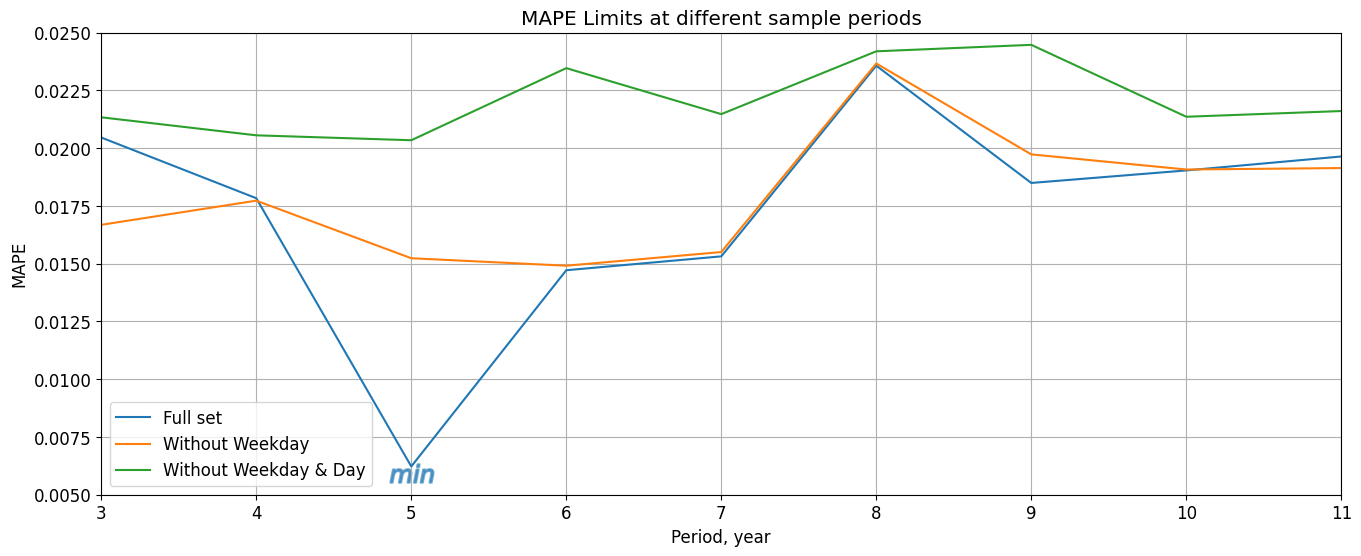

In [1213]:
plot_gen = list()
for i in range(len(messages)):
    plot_gen.append(df_general_result[df_general_result['set'] == messages[i]])
    plot_gen[i]=plot_gen[i][['period', 'MAPE']]
    plot_gen[i].set_index('period', inplace= True)
    plot_gen[i] = plot_gen[i].rename(columns={'MAPE': messages[i].rstrip()[:-1]})

pd.concat([plot_gen[i] for i in range(3)], axis=1).plot(figsize=(16,6), 
                                                        title='MAPE Limits at different sample periods',
                                                        xlim=(3, 11), ylim=(0.005, 0.025),
                                                        xlabel='Period, year',
                                                        ylabel='MAPE',
                                                        legend=True,
                                                        grid=True)

plt.scatter(df_general_result.period[df_general_result.MAPE.idxmin()], 
            df_general_result.MAPE.min()-0.0003,
            linewidth=1.5,
            marker='$min$',
            alpha=0.6,
            s=1000)

**Выводы**: 
1. Фильтрация малозначимых исходных данных в *большинстве* случаев **снижает** точность прогнозной модели. 
2. Ограничение объема тестовой выборки приводит к **снижению** погрешности на 0.18–1.28% (!). Лучший результат был получен для тестовой выборки объемом в **5 лет**.
3. Полученный результат близок к тому, что описан в [статье](https://www.mdpi.com/2411-5134/8/5/114)

*Оценка прогнозирования за 2023 год при оптимальных гиперпараметрах с разбивкой по месяцам*

In [1231]:
%%time

df_boost_test = df_test.copy()  # формируем тестовый датафрейм
df_boost_train = df[df['Year'] > 2018]  # формируем валидационный датафрейм

# обучаем модель
model = xgb.XGBRegressor(tree_method='gpu_hist',  # включаем ранее найденные оптимальные гиперпараметры 
                         n_estimators = 100,
                         max_depth = 7)

model.fit(df_boost_train[dataset[0]], df_boost_train['Volume'])
df_boost_test[predictions[0]] = model.predict(df_boost_test[dataset[0]])
df_boost_test['Error'] = abs((df_boost_test['Volume'] - df_boost_test['Predicted'])*100/df_boost_test['Volume'])

CPU times: total: 1.41 s
Wall time: 1.17 s


In [1232]:
month = list(name for name in calendar.month_name)

df_month_result = pd.DataFrame({'Month':[],
                                'MAE [MW]':[],
                                'MAPE':[]})

for i in range(12):
    df_month = df_boost_test[df_boost_test['Month'] == i + 1]
    if df_month.shape[0]:
        df_month_result.loc[i] = (month[i + 1],
                                  f"{MAE(df_month['Predicted'], df_month['Volume']):.2f}", 
                                  f"{MAPE(df_month['Predicted'], df_month['Volume']):.2%}")


#df_month_result.set_index("Month")
df_month_result

,Month,MAE [MW],MAPE
0,January,16.58,0.43%
1,February,18.61,0.50%
2,March,20.45,0.58%
3,April,19.86,0.64%
4,May,19.54,0.64%
5,June,26.48,0.89%
6,July,22.46,0.74%
7,August,19.83,0.65%
8,September,13.99,0.48%


*Сравнение прогнозных значений с фактическими*

Text(0.5, 1.0, 'The segment of the model testing process (September 2023)')

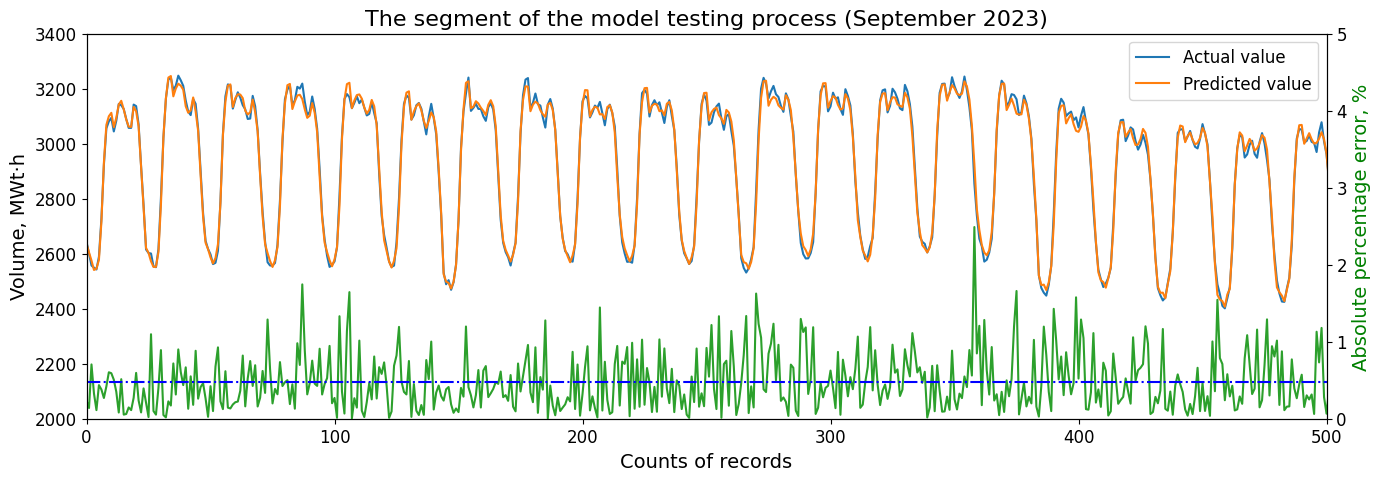

In [1272]:
df_sept = df_boost_test[df_boost_test['Month'] == 9]
df_sept.insert(df_sept.shape[1], 'MAPE', MAPE(df_sept['Predicted'], df_sept['Volume'])*100)
df_sept.reset_index(drop=True, inplace=True)

fig, df_volume = plt.subplots(figsize=(16,5))
df_error = df_volume.twinx()

df_volume.plot(df_sept['Volume'], label='Actual value')
df_volume.plot(df_sept['Predicted'], label='Predicted value')
df_error.plot(df_sept['Error'], label='Error, %', color='#2ca02c')
df_error.plot(df_sept['MAPE'], '-.b')

plt.rcParams['font.size'] = '12'

df_volume.legend(loc='upper right')
df_volume.set_xlim(0, 500)
df_volume.set_ylim(2000, 3400)
df_volume.set_ylabel('Volume, MWt·h', fontsize = 14)
df_volume.set_xlabel('Counts of records', fontsize = 14)

df_error.set_ylim(0, 5)
df_error.set_ylabel('Absolute percentage error, %', fontsize = 14, color='g')

plt.title('The segment of the model testing process (September 2023)', fontsize = 16)

**Вывод**: полученный результат близок к тому, что описан в [статье](https://www.mdpi.com/2411-5134/8/5/114)

In [ ]:
# пример изменений в файле проекта

### Черновики

In [368]:
df_boost_train = df_train.copy()  # формируем обучающий датафрейм
df_boost_test = df_test.copy()  # формируем тестовый датафрейм

# обучаем модель
model = xgb.XGBRegressor() # выполнить поиск оптимальных гиперпараметров
model.fit(df_boost_train[['Year', 'Month', 'Day', 'Hour', 'Weekday']].values.reshape(-1, 5), y = df_boost_train['Volume'].values)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [405]:
# Предсказываем пиковый час
df_boost_test['Predicted'] = model.predict(df_boost_test[['Year', 'Month', 'Day', 'Hour', 'Weekday']].values.reshape(-1, 5))

# Метрики качества прогноза
print('MAE:', f"{MAE(df_boost_test['Predicted'], df_boost_test['Volume']):.2f} [MW]",
      '\nMAPE:', f"{MAPE(df_boost_test['Predicted'], df_boost_test['Volume']):.2%}")

MAE: 182.43 [MW] 
MAPE: 5.31%


In [668]:
# перебор гиперпараметра max_depth в цикле
df_boost_train = df_train[df_train['Year'] > 2019]  # формируем обучающий датафрейм
df_boost_test = df_test.copy()

# инициализируем итоговый датафрейм с метриками качества при различных гиперпараметрах модели
df_result = pd.DataFrame({'MAE [MW]':[], 'MAPE':[]})

# обучаем модель
for i in range(2, 10):
    model = xgb.XGBRegressor(max_depth=i, n_estimators=9, tree_method='gpu_hist')
    model.fit(df_boost_train[['Year', 'Month', 'Day', 'Hour', 'Weekday']].values.reshape(-1, 5), y = df_boost_train['Volume'].values)
    
    df_boost_test['Predicted'] = model.predict(df_boost_test[['Year', 'Month', 'Day', 'Hour', 'Weekday']].values.reshape(-1, 5))
    
    # заполняем итоговый датафрейм метрикой MAPE
    df_result.loc[i] = (MAE(df_boost_test['Predicted'], df_boost_test['Volume']), 
                        MAPE(df_boost_test['Predicted'], df_boost_test['Volume']))
    
print('Минимальная погрешность:', f"{df_result.MAPE.min():.2%}", 'при глубине:', df_result.MAPE.idxmin())

# соотношение глубины дерева к результату
df_result.loc[0:5].style.highlight_min(color='yellowgreen', subset='MAPE')

Минимальная погрешность: 3.12% при глубине: 5


,MAE [MW],MAPE
2,150.683185,0.046506
3,116.404700,0.035771
4,106.606369,0.032739
5,101.430693,0.031152


In [651]:
%%time
from tqdm import tqdm

# перебор гиперпараметра n_estimators в цикле
df_boost_train = df_train.copy()  # формируем обучающий датафрейм
df_boost_test = df_test.copy()

# инициализируем итоговый датафрейм с метриками качества при различных гиперпараметрах модели
df_result = pd.DataFrame({'MAE [MW]':[], 'MAPE':[]})

# обучаем модель
for i in tqdm(range(2, 30)):
    model = xgb.XGBRegressor(max_depth=3, n_estimators=i, tree_method='gpu_hist')
    model.fit(df_boost_train[['Year', 'Month', 'Day', 'Hour', 'Weekday']].values.reshape(-1, 5), y = df_boost_train['Volume'].values)
    
    df_boost_test['Predicted'] = model.predict(df_boost_test[['Year', 'Month', 'Day', 'Hour', 'Weekday']].values.reshape(-1, 5))
    
    # заполняем итоговый датафрейм метрикой MAPE
    df_result.loc[i] = (MAE(df_boost_test['Predicted'], df_boost_test['Volume']), 
                        MAPE(df_boost_test['Predicted'], df_boost_test['Volume']))
    
print('Минимальная погрешность:', f"{df_result.MAPE.min():.2%}", 'при глубине:', df_result.MAPE.idxmin())

# соотношение глубины дерева к результату
df_result.loc[0:5].style.highlight_min(color='yellowgreen', subset='MAPE')

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:03<00:00,  9.22it/s]

Минимальная погрешность: 3.83% при глубине: 9
CPU times: total: 15 s
Wall time: 3.04 s


,MAE [MW],MAPE
2,1538.786129,0.909022
3,1068.457990,0.492941
4,720.563259,0.284726
5,448.085818,0.158253


*версия вложенного цикла с виджетом*

In [666]:
%%time
from tqdm import trange

# перебор гиперпараметров во вложенном цикле
df_boost_train = df_train[df_train['Year'] > 2017]  # формируем обучающий датафрейм
df_boost_test = df_test.copy()

# инициализируем итоговый датафрейм с метриками качества при различных гиперпараметрах модели
df_result = pd.DataFrame({'depth':[], 
                          'n_estimators':[], 
                          'MAE [MW]':[], 
                          'MAPE':[]})

# обучаем модель
index = 0  # количество узлов сетки
for i in trange(2, 10, desc="Training Model for max_depth"):  # глубина дерева (max_depth)
    for j in trange(2, 100, desc=f"max_depth = {i}"):  # количество деревьев (n_estimators)
        model = xgb.XGBRegressor(max_depth=i, n_estimators=j, tree_method='gpu_hist')
        model.fit(df_boost_train[['Year', 'Month', 'Day', 'Hour', 'Weekday']].values.reshape(-1, 5), y = df_boost_train['Volume'].values)

        df_boost_test['Predicted'] = model.predict(df_boost_test[['Year', 'Month', 'Day', 'Hour', 'Weekday']].values.reshape(-1, 5))

        # заполняем итоговый датафрейм метриками MAE и MAPE
        df_result.loc[index] = (f'{i}', f'{j}', 
                                f"{MAE(df_boost_test['Predicted'], df_boost_test['Volume']):.2f}", 
                                MAPE(df_boost_test['Predicted'], df_boost_test['Volume']))
        index += 1;
    
print('Минимальная погрешность:', f"{df_result.MAPE.min():.2%}", 
      'при глубине –', df_result.depth[df_result.MAPE.idxmin()],
      'и количестве деревьев –', df_result.n_estimators[df_result.MAPE.idxmin()], '\n')

max_depth = 3:  68%|█████████████████████████████████████████████▊                     | 67/98 [00:07<00:05,  5.40it/s]


max_depth = 5:  30%|███████████████████▊                                               | 29/98 [00:02<00:08,  7.94it/s]


max_depth = 6:  74%|█████████████████████████████████████████████████▉                 | 73/98 [00:12<00:06,  3.80it/s]


max_depth = 8:  24%|████████████████▍                                                  | 24/98 [00:02<00:11,  6.41it/s]


max_depth = 9:  65%|███████████████████████████████████████████▊                       | 64/98 [00:16<00:15,  2.23it/s]


Training Model for max_depth: 100%|██████████████████████████████████████████████████████| 8/8 [02:48<00:00, 21.02s/it]

Минимальная погрешность: 3.04% при глубине – 5 и количестве деревьев – 9 

CPU times: total: 12min 2s
Wall time: 2min 48s


In [667]:
df_result.loc[df_result.MAPE.idxmin()-3:df_result.MAPE.idxmin()+3].style.highlight_min(color='yellowgreen', subset='MAPE')

,depth,n_estimators,MAE [MW],MAPE
298,5,6,253.21,0.084547
299,5,7,142.50,0.045508
300,5,8,102.09,0.031962
301,5,9,99.35,0.030444
302,5,10,113.42,0.034477
303,5,11,126.57,0.038043
304,5,12,136.20,0.040684


In [774]:
df_boost_train = df_train[df_train['Year'] > 2019]
df_boost_train

,Year,Month,Day,Hour,Weekday,Volume
40128,2020,1,9,1,3,3145.229
40129,2020,1,9,2,3,3109.832
40130,2020,1,9,3,3,3098.357
40131,2020,1,9,4,3,3095.990
40132,2020,1,9,5,3,3115.652
...,...,...,...,...,...,...
57523,2022,12,30,20,4,3664.178
57524,2022,12,30,21,4,3609.495
57525,2022,12,30,22,4,3569.476
57526,2022,12,30,23,4,3429.831
